# Analyzing Healthcare Provider Shortage - Part 4/4

The big question that we would like to answer with this analysis is that: `What are the socieconomic and demographic factors that influence access to mental healthcare providers?`

In this notebook, will try to answer this question by:

 - Identifying which factors are most predictive of provider count
 - Identifying the influence these factors have on provider count
 - Identifying whether the influence is positive or negative

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyzing-Healthcare-Provider-Shortage---Part-4/4" data-toc-modified-id="Analyzing-Healthcare-Provider-Shortage---Part-4/4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing Healthcare Provider Shortage - Part 4/4</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Create-a-GIS-Connection" data-toc-modified-id="Import-Libraries-and-Create-a-GIS-Connection-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Import Libraries and Create a GIS Connection</a></span></li></ul></li></ul></li><li><span><a href="#Understand-Healthcare-Provider-Shortage" data-toc-modified-id="Understand-Healthcare-Provider-Shortage-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understand Healthcare Provider Shortage</a></span><ul class="toc-item"><li><span><a href="#Gather-and-Plot-Data" data-toc-modified-id="Gather-and-Plot-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gather and Plot Data</a></span><ul class="toc-item"><li><span><a href="#Get-the-Cleaned-Data-Layer" data-toc-modified-id="Get-the-Cleaned-Data-Layer-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Get the Cleaned Data Layer</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Plot Data</a></span><ul class="toc-item"><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Pair Plot</a></span></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>Correlation Plot</a></span></li></ul></li></ul></li><li><span><a href="#Generate-a-Global-Model" data-toc-modified-id="Generate-a-Global-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Generate a Global Model</a></span><ul class="toc-item"><li><span><a href="#Create-Predictor-and-Response-Variables" data-toc-modified-id="Create-Predictor-and-Response-Variables-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Create Predictor and Response Variables</a></span></li><li><span><a href="#Create-a-Base-Model" data-toc-modified-id="Create-a-Base-Model-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Create a Base Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model-using-Stats-Models" data-toc-modified-id="Linear-Regression-Model-using-Stats-Models-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Linear Regression Model using Stats Models</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Verify Assumptions</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>Outlier Detection</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-2.2.2.4"><span class="toc-item-num">2.2.2.4&nbsp;&nbsp;</span>Remove Outliers</a></span></li></ul></li><li><span><a href="#Feature-Selection-and-Importance" data-toc-modified-id="Feature-Selection-and-Importance-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Feature Selection and Importance</a></span><ul class="toc-item"><li><span><a href="#Run-Feature-Selection-Algorithms" data-toc-modified-id="Run-Feature-Selection-Algorithms-2.2.3.1"><span class="toc-item-num">2.2.3.1&nbsp;&nbsp;</span>Run Feature Selection Algorithms</a></span></li><li><span><a href="#Identify-Features-Using-Lasso" data-toc-modified-id="Identify-Features-Using-Lasso-2.2.3.2"><span class="toc-item-num">2.2.3.2&nbsp;&nbsp;</span>Identify Features Using Lasso</a></span></li></ul></li><li><span><a href="#Regression-with-Selected-Features" data-toc-modified-id="Regression-with-Selected-Features-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Regression with Selected Features</a></span><ul class="toc-item"><li><span><a href="#Clean-the-Data" data-toc-modified-id="Clean-the-Data-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>Clean the Data</a></span></li><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-2.2.4.2"><span class="toc-item-num">2.2.4.2&nbsp;&nbsp;</span>Transform Data</a></span></li><li><span><a href="#Run-Global-Model" data-toc-modified-id="Run-Global-Model-2.2.4.3"><span class="toc-item-num">2.2.4.3&nbsp;&nbsp;</span>Run Global Model</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.2.4.4"><span class="toc-item-num">2.2.4.4&nbsp;&nbsp;</span>Verify Assumptions</a></span></li></ul></li></ul></li><li><span><a href="#Geographically-Weighted-Regression-(GWR)-Model" data-toc-modified-id="Geographically-Weighted-Regression-(GWR)-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Geographically Weighted Regression (GWR) Model</a></span><ul class="toc-item"><li><span><a href="#Run-GWR-Model" data-toc-modified-id="Run-GWR-Model-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Run GWR Model</a></span></li><li><span><a href="#Access-GWR-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-GWR-Results-as-Spatially-Enabled-Dataframe-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Access GWR Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-GWR-Results" data-toc-modified-id="Plot-GWR-Results-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Plot GWR Results</a></span><ul class="toc-item"><li><span><a href="#Plot-Average-Household-Size" data-toc-modified-id="Plot-Average-Household-Size-2.3.3.1"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Plot Average Household Size</a></span></li><li><span><a href="#Plot-Average-Prescription-Drug" data-toc-modified-id="Plot-Average-Prescription-Drug-2.3.3.2"><span class="toc-item-num">2.3.3.2&nbsp;&nbsp;</span>Plot Average Prescription Drug</a></span></li></ul></li></ul></li><li><span><a href="#Forest-Based-Classification-and-Regression-Trees-Model" data-toc-modified-id="Forest-Based-Classification-and-Regression-Trees-Model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Forest Based Classification and Regression Trees Model</a></span><ul class="toc-item"><li><span><a href="#Build-RF-Model" data-toc-modified-id="Build-RF-Model-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Build RF Model</a></span></li><li><span><a href="#Get-Variable-Importance" data-toc-modified-id="Get-Variable-Importance-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Get Variable Importance</a></span></li><li><span><a href="#Plot-Variable-Importance" data-toc-modified-id="Plot-Variable-Importance-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Plot Variable Importance</a></span><ul class="toc-item"><li><span><a href="#Plot-Best-Iteration" data-toc-modified-id="Plot-Best-Iteration-2.4.3.1"><span class="toc-item-num">2.4.3.1&nbsp;&nbsp;</span>Plot Best Iteration</a></span></li></ul></li></ul></li><li><span><a href="#Local-Bivariate-Relationships-(LBR)-Model" data-toc-modified-id="Local-Bivariate-Relationships-(LBR)-Model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Local Bivariate Relationships (LBR) Model</a></span><ul class="toc-item"><li><span><a href="#Build-Model---Provider-Count-and-White-Population" data-toc-modified-id="Build-Model---Provider-Count-and-White-Population-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Build Model - Provider Count and White Population</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-2.5.1.1"><span class="toc-item-num">2.5.1.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-2.5.1.2"><span class="toc-item-num">2.5.1.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Graduate-Degree" data-toc-modified-id="Build-Model---Provider-Count-and-Graduate-Degree-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Build Model - Provider Count and Graduate Degree</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-2.5.2.1"><span class="toc-item-num">2.5.2.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-2.5.2.2"><span class="toc-item-num">2.5.2.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Some-College" data-toc-modified-id="Build-Model---Provider-Count-and-Some-College-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Build Model - Provider Count and Some College</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-2.5.3.1"><span class="toc-item-num">2.5.3.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-2.5.3.2"><span class="toc-item-num">2.5.3.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Asian-Population" data-toc-modified-id="Build-Model---Provider-Count-and-Asian-Population-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Build Model - Provider Count and Asian Population</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-2.5.4.1"><span class="toc-item-num">2.5.4.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-2.5.4.2"><span class="toc-item-num">2.5.4.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Hispanic-Population" data-toc-modified-id="Build-Model---Provider-Count-and-Hispanic-Population-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Build Model - Provider Count and Hispanic Population</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-2.5.5.1"><span class="toc-item-num">2.5.5.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-2.5.5.2"><span class="toc-item-num">2.5.5.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Black-Population" data-toc-modified-id="Build-Model---Provider-Count-and-Black-Population-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>Build Model - Provider Count and Black Population</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-2.5.6.1"><span class="toc-item-num">2.5.6.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-2.5.6.2"><span class="toc-item-num">2.5.6.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Understand Healthcare Provider Shortage
<a name="mental-health"></a>

In this section, we will:
- Generate a Base (OLS) Model of provider count using demographic and health expenditure variables
- Perform Feature Selection using multiple techniques to select relevant features
- Run a Global (OLS) model using selected features
- Create a Geographically Weighted Regression (GWR) Model to understand impact how impact of various predictors varies accross different counties
- Create a Forest Based Classification and Regression Trees Model to understand Non-linear relations and to indentify important variables
- Create Local Bivariate Relationships (LBR) Model to understand the type and significance of relationships of Provider Count with respect to variables selected from Forest based model.

In [2]:
# Import Libraries
from IPython.display import display

# Import arcgis
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import libraries for data exploration
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for time
import time


In [3]:
# Create connection
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

## Gather and Plot Data
<a name="gather-data"></a>

To understand shortage of healthcare providers we will try to identify socioeconomic and demographic factors that influence access to these providers. We will use Esri's Living Atlas data layers to access socioeconomic, demographic, health expenditure and combine it with provider data for this analysis.

### Get the Cleaned Data Layer

In [35]:
# Search for the data layer
allsearch_result = gis.content.search('title: demographic_healthexp_clean_allproviders')
allsearch_result

[<Item title:"demographic_healthexp_clean_allproviders" type:Service Definition owner:portaladmin>,
 <Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>]

<Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>
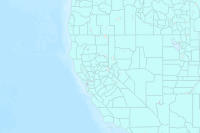

In [36]:
# Get the layer
allprovider = allsearch_result[1]
allprovider

In [37]:
allprovider_layer = allprovider.layers[0]
for f in allprovider_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

objectid 	 OBJECTID
state 	 state
county 	 county
asian_pop 	 asian_pop
amerind_pop 	 amerind_pop


In [8]:
# Store data from layer as a spatially enabled dataframe
allprovider_df = allprovider_layer.query(as_df=True)
allprovider_df.shape

(3139, 41)

In [9]:
# Look at the first few rows of dataframe
allprovider_df.head()

objectid1  objectid  objectid_left st_abbrev_left         name_left  \
0          1      2089           1197             MD    Calvert County   
1          2      2321           1429             MS  Issaquena County   
2          3      1509           2117             OH     Seneca County   
3          4      2785            393             GA      Banks County   
4          5      2901            509             GA   Rockdale County   

   asian_cy  amerind_cy  avghhsz_cy  avghinc_cy  black_cy  educbasecy  \
0      1701         423        2.85      118378     12062       65337   
1         6           3        2.40       38216       895         977   
2       421         168        2.47       63225      1422       38284   
3       258          69        2.77       60360       558       13282   
4      1727         307        2.81       73754     49467       60571   

   hisppop_cy  medage_cy  minoritycy  othrace_cy  pci_cy  popdens_cy  \
0        3945       41.0       20664         886   41430       440.2   
1           8       37.9         913           2   16066         3.4   
2        2977       40.0        5873         882   24981       101.8   
3        1307       40.4        2464         759   21821        81.6   
4        9491       37.8       62154        4497   26350       692.1   

   unemprt_cy  white_cy  smcoll_cy  asscdeg_cy  bachdeg_cy  graddeg_cy  \
0         5.6     75625      16211        5020       10961        8931   
1         5.2       494        199          29          50          45   
2         5.5     51908       7627        4309        3811        2153   
3         3.1     16894       2043         855         990         574   
4         6.1     31300      11944        5603       11105        5462   

   totpop_cy  index_right  objectid_right st_abbrev_right        name_right  \
0      93836         1838            1197              MD    Calvert County   
1       1403         2070            1429              MS  Issaquena County   
2      56104          758            2117              OH     Seneca County   
3      18940         3034             393              GA      Banks County   
4      89832         2150             509              GA   Rockdale County   

   x8001_a  x8002_a  x8013_a  x8018_a  x8019_a  x8024_a  x8032_a  x13002_a  \
0  7896.60  5227.44   767.21  2669.16  1497.17    83.06   157.57    592.98   
1  3310.96  2149.61   475.83  1161.34   579.97    36.65   102.27    191.88   
2  4698.76  3081.77   547.19  1616.99   861.89    51.40   114.41    313.28   
3  4625.75  3042.93   557.61  1582.82   822.59    47.81   122.89    289.06   
4  5085.66  3356.61   520.50  1729.05   948.00    54.48   109.17    344.50   

   x13004_a   count  SHAPE__Length   SHAPE__Area  \
0  11766.62  1044.0  315375.798068  9.139007e+08   
1   3298.61     5.0  387524.213325  1.526209e+09   
2   5933.05   621.0  207757.548436  2.522762e+09   
3   5640.16    79.0  124819.289536  8.908702e+08   
4   7113.68  1210.0  117646.898958  4.963801e+08   

                                               SHAPE  
0  {'rings': [[[-8529642.2486, 4688391.039899997]...  
1  {'rings': [[[-10120538.0346, 3896326.054200001...  
2  {'rings': [[[-9221715.5229, 5050074.560699999]...  
3  {'rings': [[[-9290699.0981, 4093591.7993], [-9...  
4  {'rings': [[[-9341355.0324, 3994505.8356000036...

We can see that the dataframe (`allprovider_df`) has 3139 rows and 41 columns.

### Plot Data
<a name="plot"></a>

Before we plot the data, we will create a copy of `allprovider_df` and remove `objectid` and `SHAPE` columns

In [32]:
# Create copy of dataframe
test_newcounty_df = allprovider_df.copy()

In [33]:
# Drop the shape and objectid columns
test_newcounty_df.drop(['objectid','SHAPE'], axis=1, inplace=True)
test_newcounty_df.columns

Index(['state', 'county', 'asian_pop', 'amerind_pop', 'avg_hhsz', 'avg_hhinc',
       'black_pop', 'edubase', 'hisp_pop', 'median_age', 'minority_pop',
       'otherace_pop', 'percap_income', 'pop_density', 'unemp_rate',
       'white_pop', 'some_college', 'asso_deg', 'bach_deg', 'grad_deg',
       'total_population', 'avg_healthcare', 'avg_healthinsurance',
       'avg_medicare', 'avg_medicalcare', 'avg_medicalsrvc', 'avg_labtest',
       'avg_presdrug', 'avg_personalinsurance', 'avg_socsecurity',
       'provider_count'],
      dtype='object')

#### Pair Plot
We will plot each numerical variable with respect to others to see how the data is distributed and how correlated the variables are with each other.

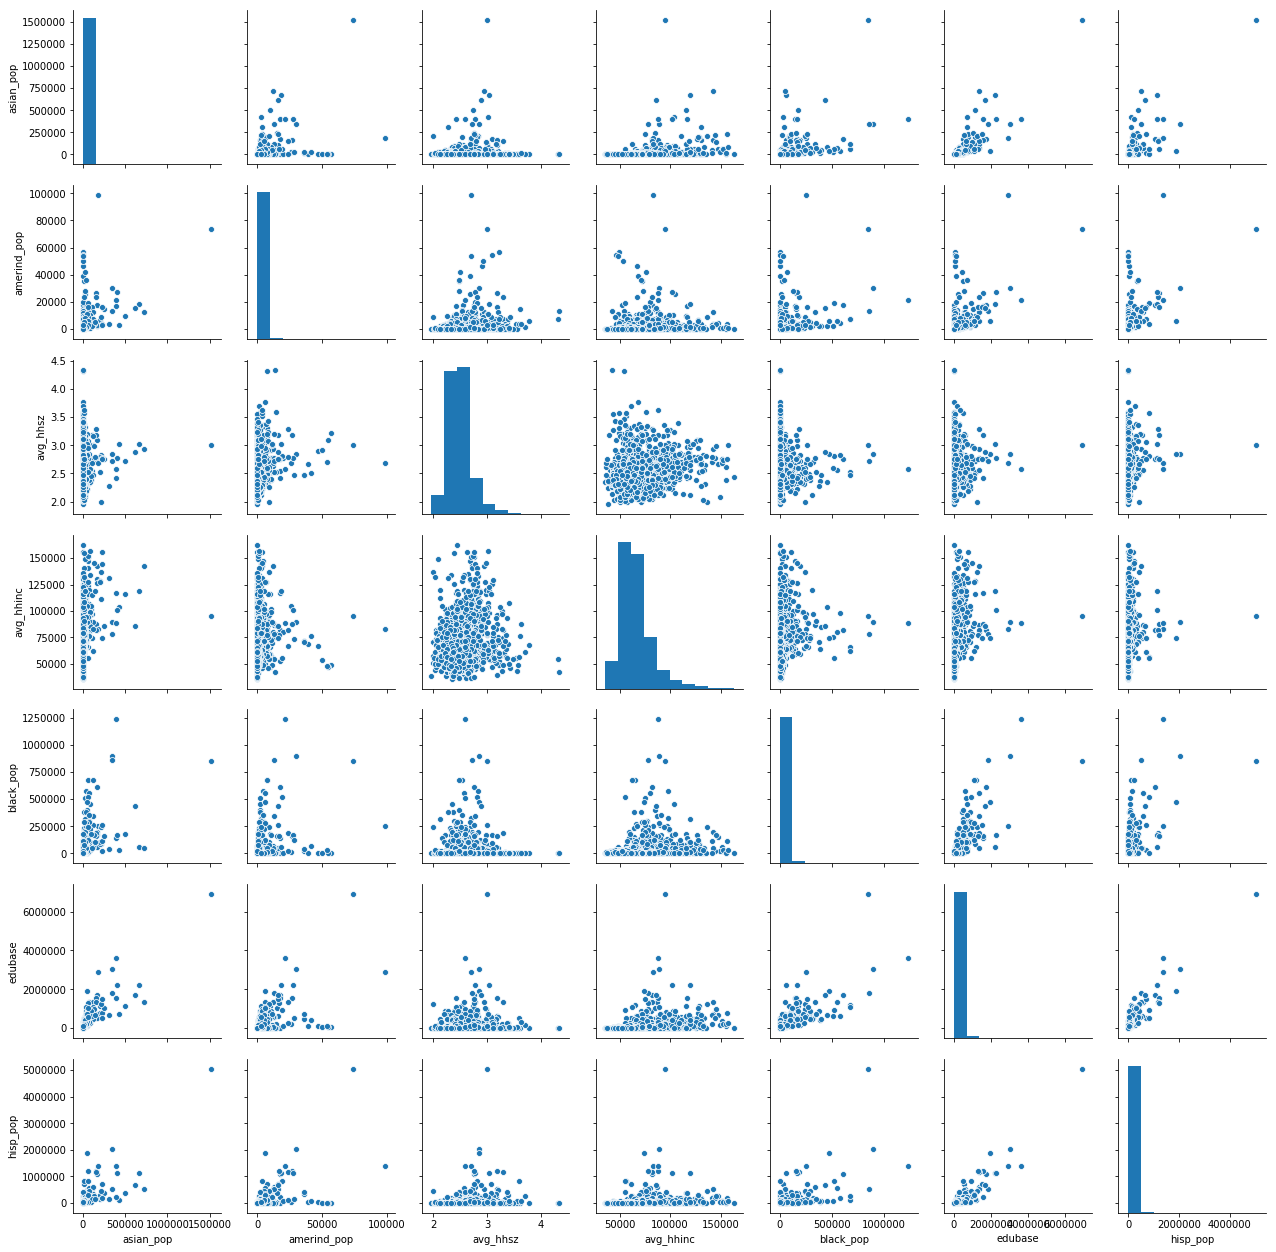

In [22]:
sns.pairplot(test_newcounty_df.iloc[:,0:9])

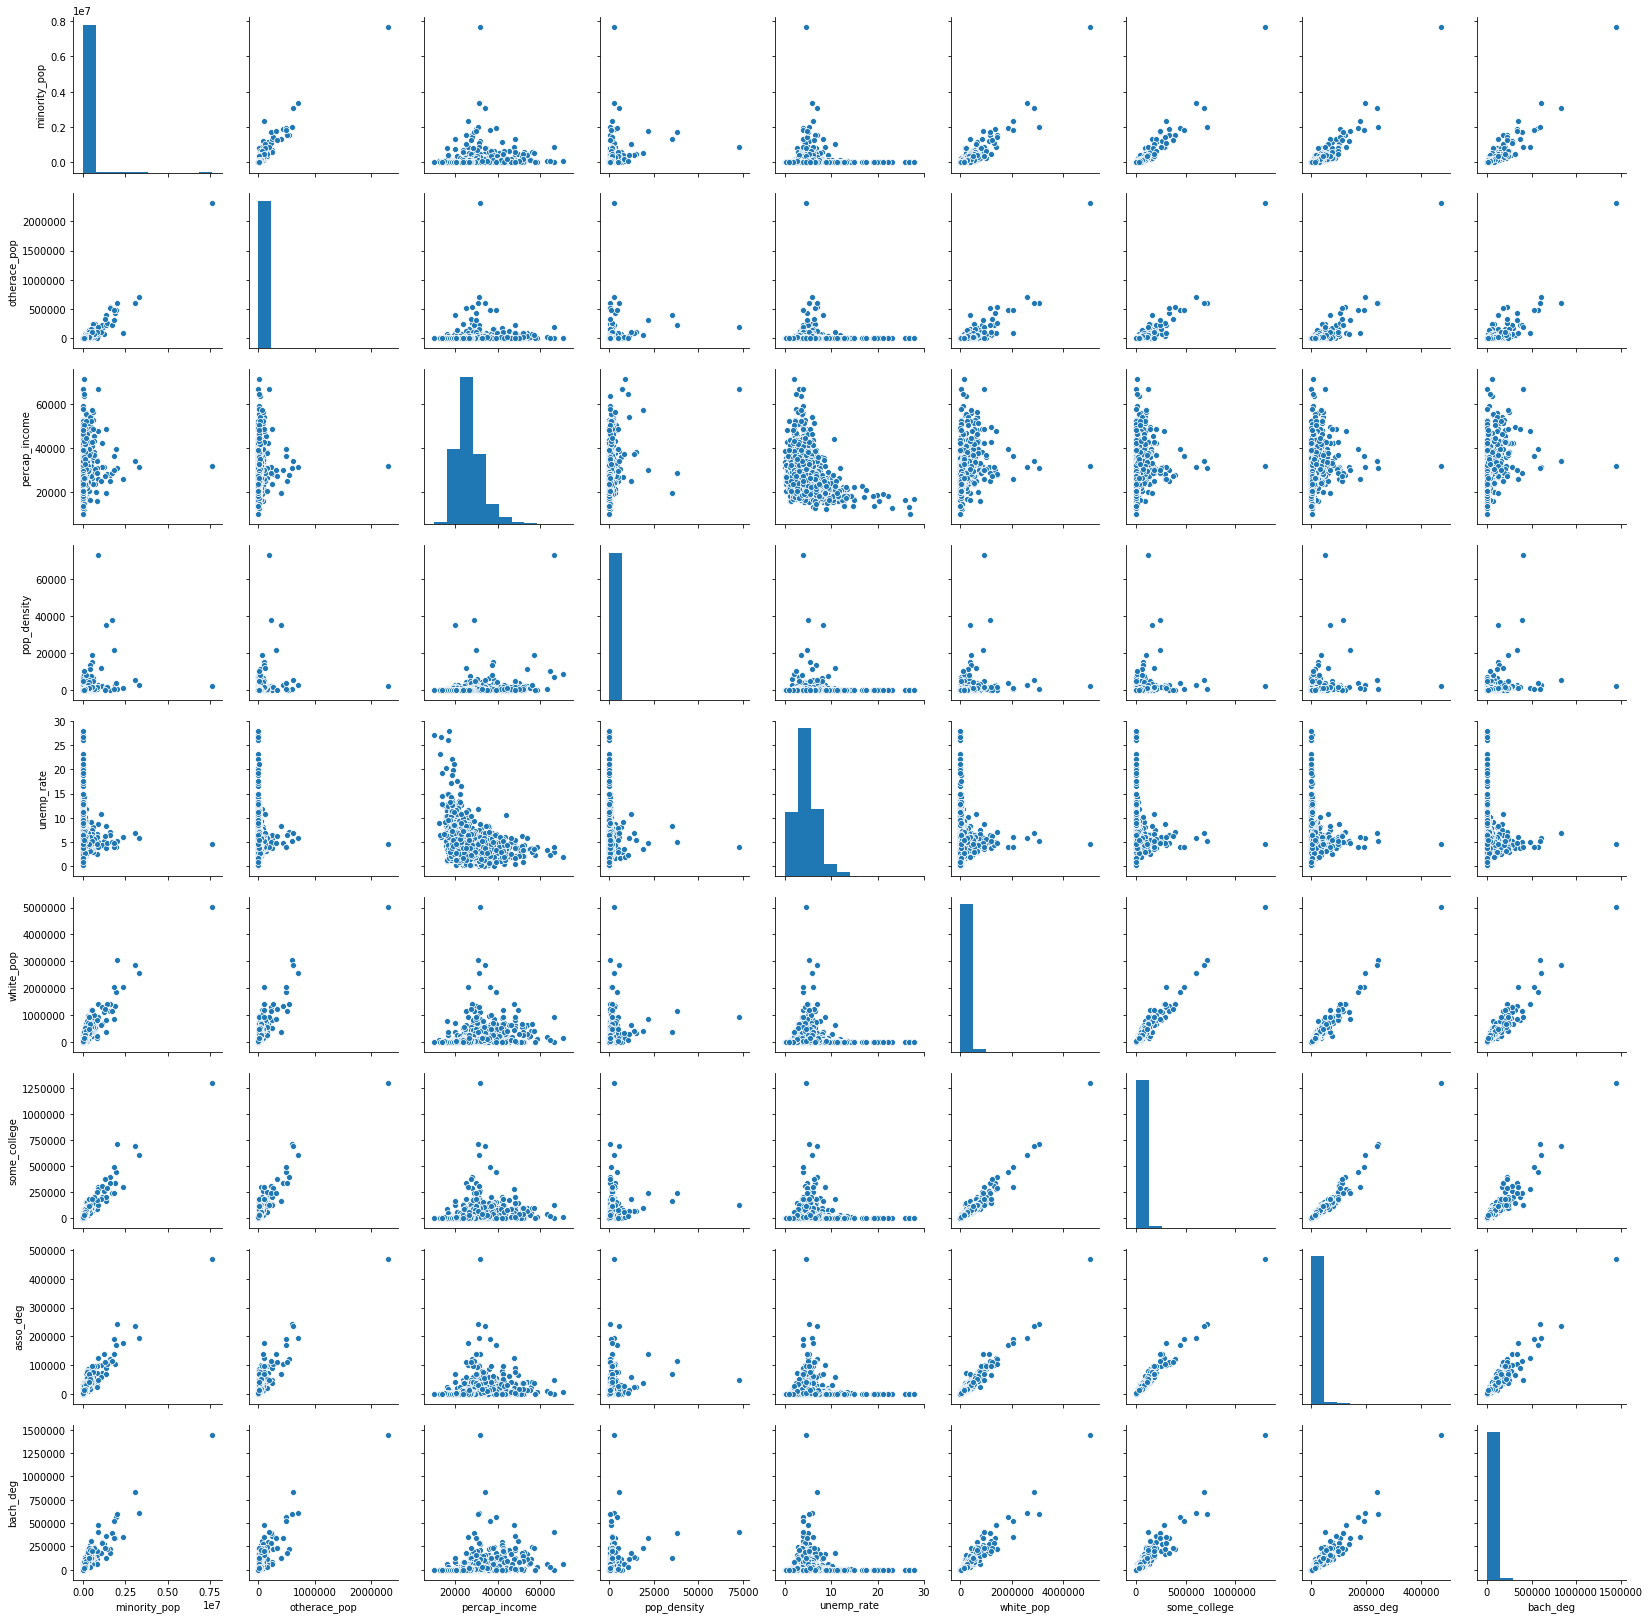

In [23]:
sns.pairplot(test_newcounty_df.iloc[:,10:19])

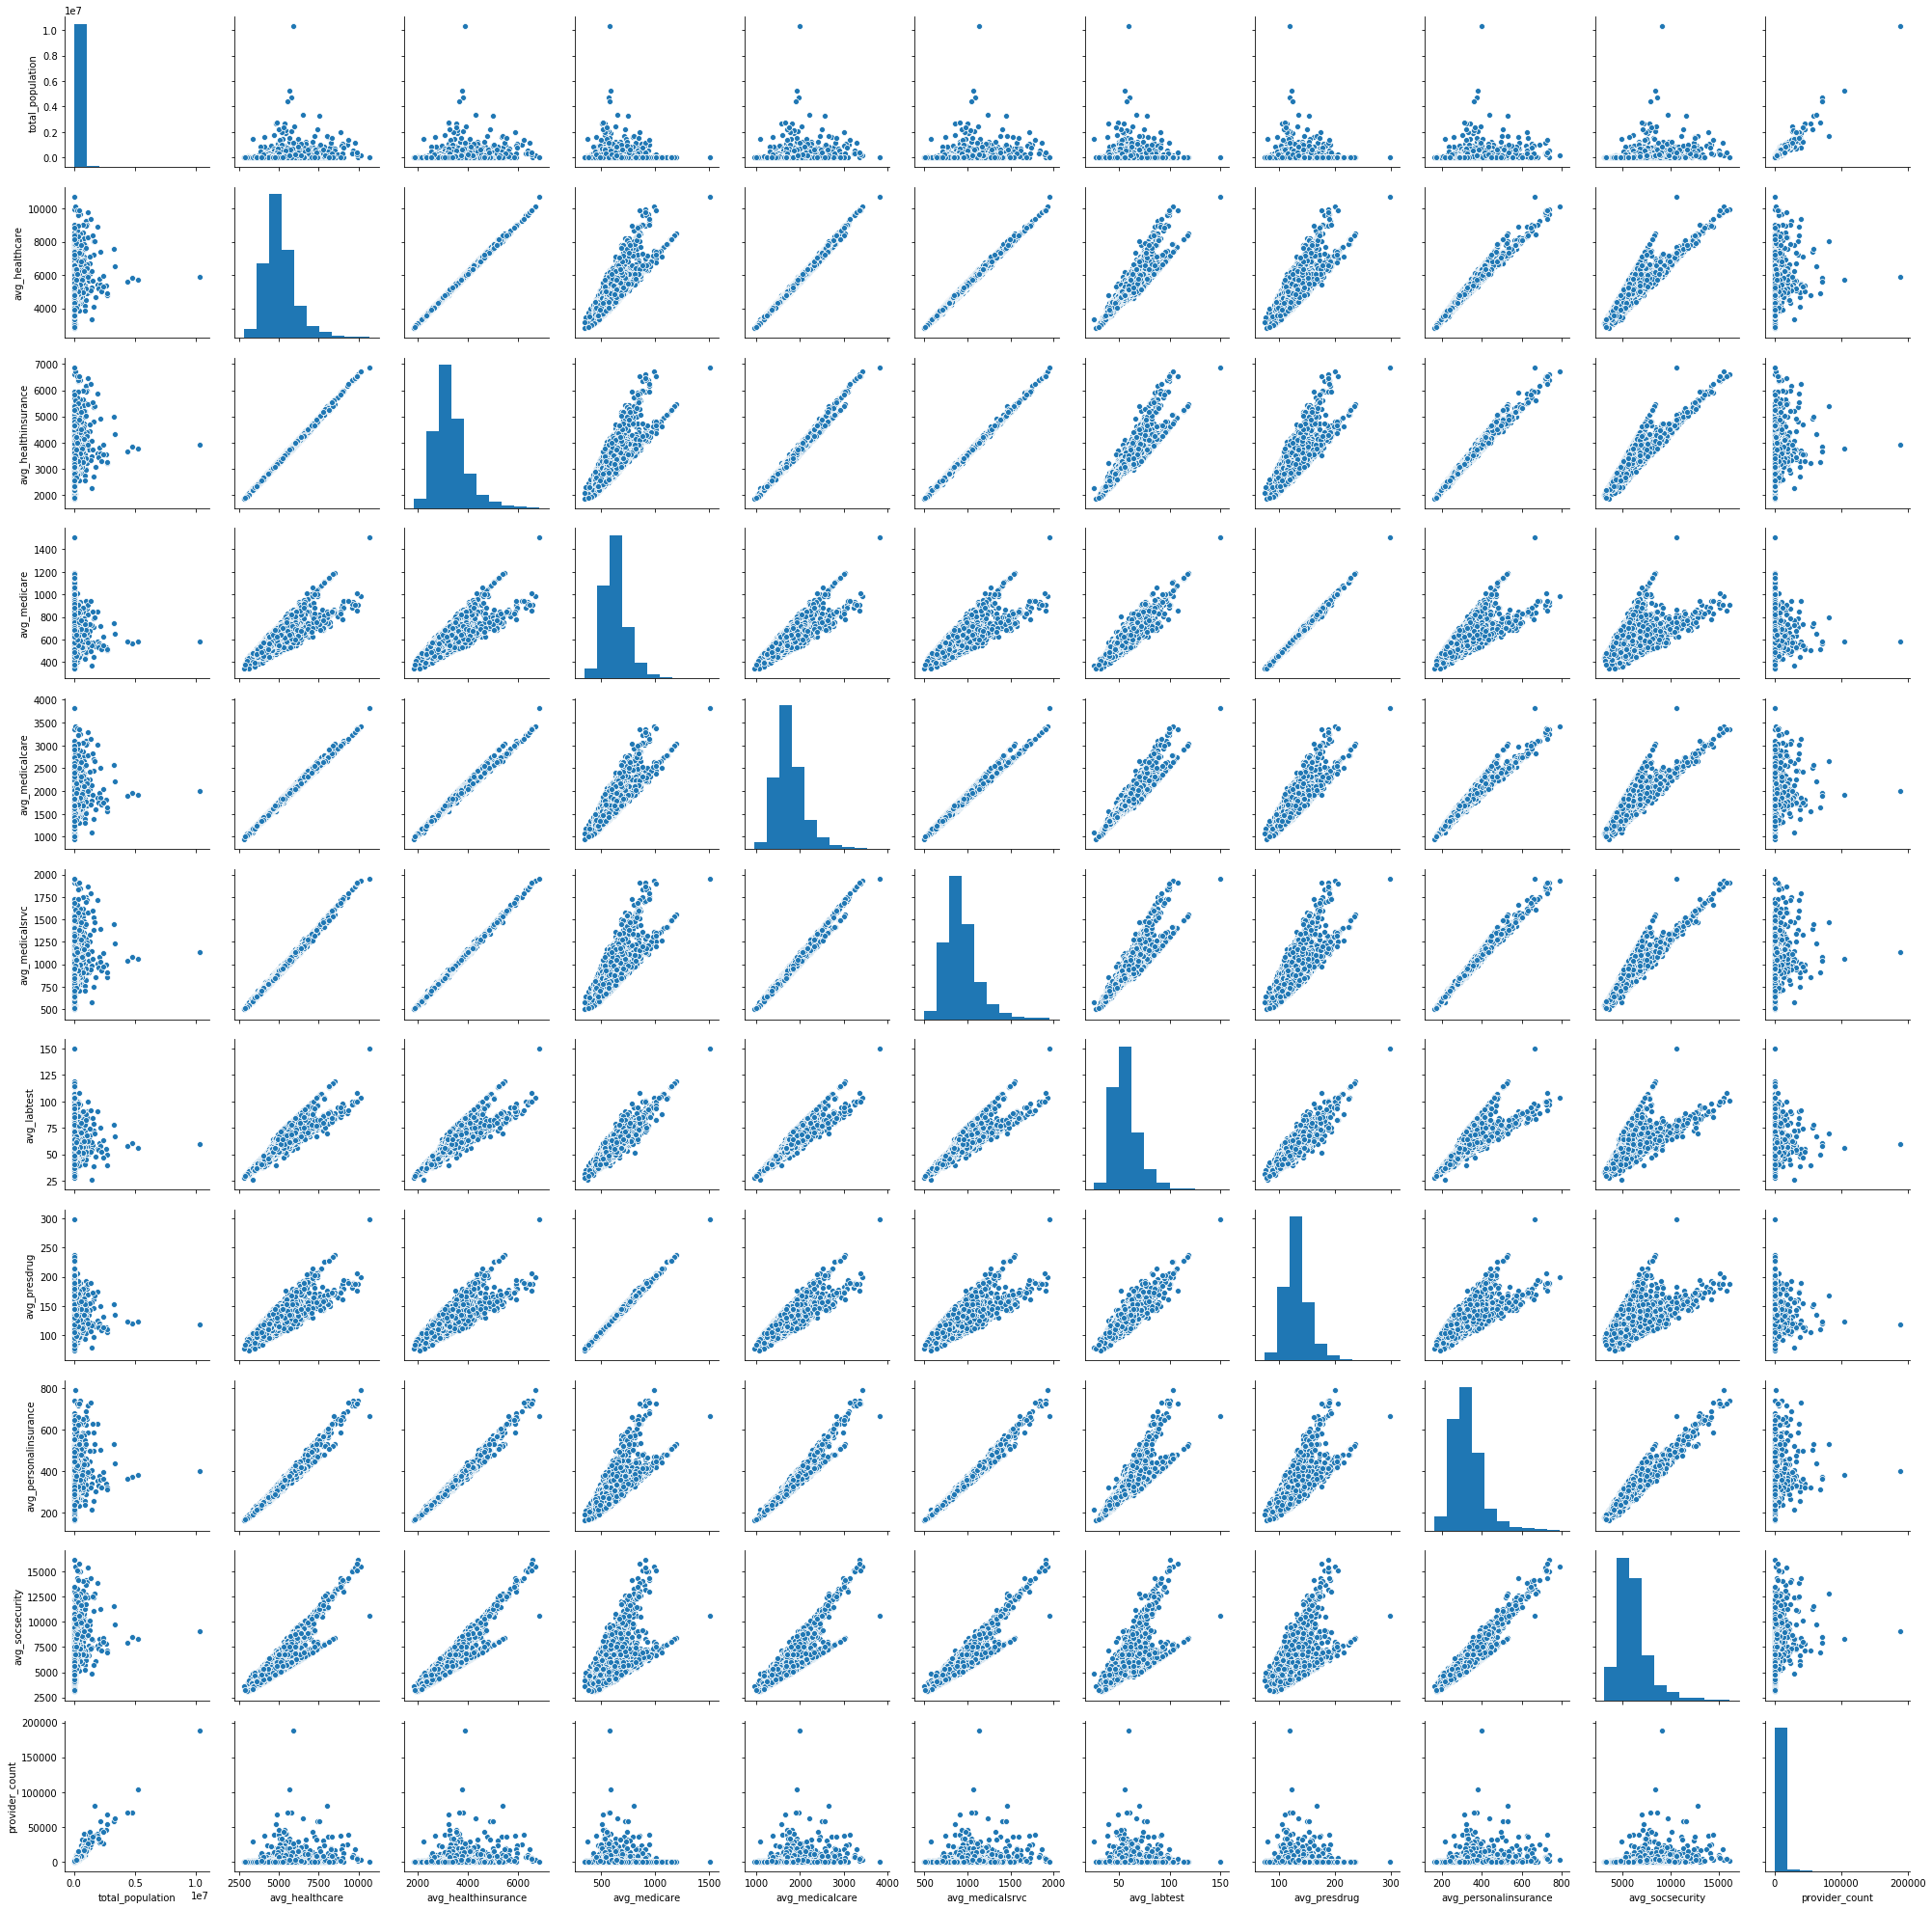

In [24]:
sns.pairplot(test_newcounty_df.iloc[:,20:])

From these pair plots we can see that:
 - Distribution of most variables is heavily right skewed
 - Some variables have outliers that influencing data distribution
 - Most demographic variables are not correlated to other demographic variables
 - Most health expenditure variables seem to be highly correlated to other health expenditure variables

#### Correlation Plot

Correlation plot is another great way to visualize correlation among predictor variables and correlation of predictors with response variable.

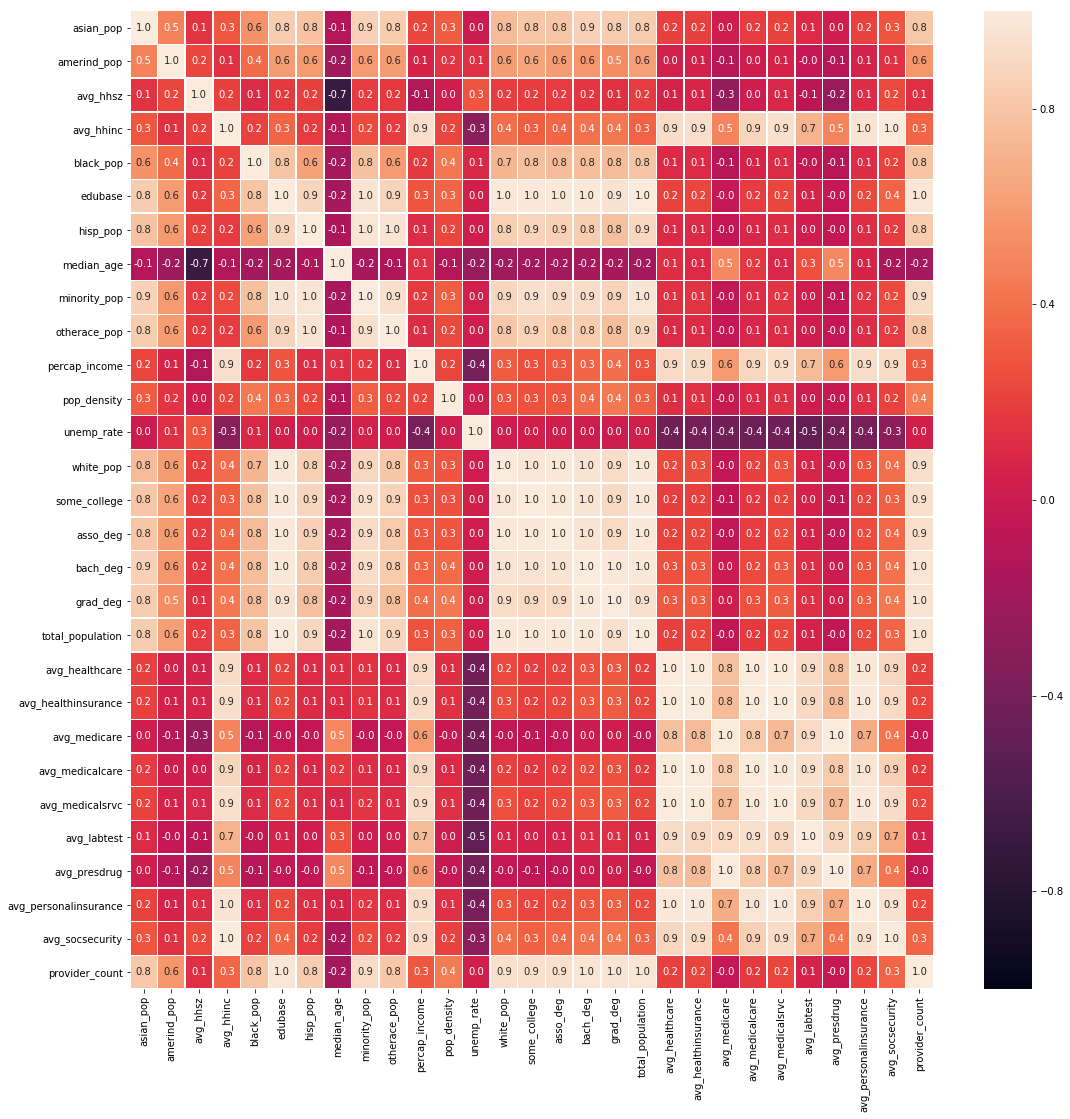

In [25]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(test_newcounty_df.corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From this plot, we can see that:
 - Education level variables are highly correlated with each other.
 - Similarly, health expensiture variables also seem to be highly correlated.

In [26]:
# Sort the values by descending order of Provider Count
test_newcounty_df = test_newcounty_df.sort_values(by=['provider_count'], ascending=False)
test_newcounty_df.head()

state              county  asian_pop  amerind_pop  avg_hhsz  avg_hhinc  \
1198    CA  Los Angeles County    1517296        73559      3.00      94861   
2784    IL         Cook County     395712        21113      2.58      88254   
2459    NY     New York County     212844         8756      2.00     136860   
1614    AZ     Maricopa County     184150        98584      2.69      83005   
1405    TX       Harris County     341640        30001      2.85      89252   

      black_pop  edubase  hisp_pop  median_age  minority_pop  otherace_pop  \
1198     850350  6899087   5043293        35.7       7644196       2305030   
2784    1233716  3607345   1374256        36.6       3078944        608672   
2459     247085  1251653    441304        37.9        899778        193191   
1614     253576  2891837   1373153        35.8       1981147        598035   
1405     901459  3029538   2035551        33.5       3339578        712410   

      percap_income  pop_density  unemp_rate  white_pop  some_college  \
1198          31563       2535.5         4.5    5019340       1300786   
2784          34083       5579.2         6.9    2859209        690225   
2459          66805      72736.2         3.9     924396        121070   
1614          30701        476.9         5.3    3066684        711033   
1405          31405       2780.1         5.9    2573473        606842   

      asso_deg  bach_deg  grad_deg  total_population  avg_healthcare  \
1198    469649   1445895    782758          10288937         5905.52   
2784    237028    830433    552050           5274129         5692.87   
2459     48360    406878    371255           1660472         8035.56   
1614    241714    597653    342159           4387226         5574.19   
1405    193511    605813    345886           4735852         5800.32   

      avg_healthinsurance  avg_medicare  avg_medicalcare  avg_medicalsrvc  \
1198              3907.44        579.43          1998.08          1132.94   
2784              3774.06        585.60          1918.81          1061.74   
2459              5382.10        796.17          2653.46          1464.96   
1614              3675.76        581.95          1898.43          1041.69   
1405              3840.81        564.48          1959.50          1087.37   

      avg_labtest  avg_presdrug  avg_personalinsurance  avg_socsecurity  \
1198        59.76        118.60                 399.93          9046.16   
2784        56.05        122.50                 381.05          8356.49   
2459        69.80        167.61                 530.01         12793.70   
1614        57.84        123.67                 362.02          7908.62   
1405        60.64        119.69                 374.86          8547.08   

      provider_count  
1198        188179.0  
2784        104037.0  
2459         80839.0  
1614         71069.0  
1405         70953.0

## Generate a Global Model

<a name="global"></a>
The idea behind a global model is to identify various socioeconomic and demographic factors that influence access to healthcare providers across all counties in the United States.

To build this global model, we will follow a 3 step process:
   1. Build an Ordinary Least Squares (OLS) Regression Model and verify regressions assumptions
   2. Perform Feature Selection using Lasso, Elastic Net and Recursive Feature Elimination techniques
   3. Using selected features, build another OLS model, check performance and verify assumptions

### Create Predictor and Response Variables

In [34]:
# Create prdictor and response variables
train_x = test_newcounty_df.iloc[:,2:-1]
train_y = test_newcounty_df.iloc[:,-1]
train_x.head()

asian_pop  amerind_pop  avg_hhsz  avg_hhinc  black_pop  edubase  hisp_pop  \
0       1701          423      2.85     118378      12062    65337      3945   
1          6            3      2.40      38216        895      977         8   
2        421          168      2.47      63225       1422    38284      2977   
3        258           69      2.77      60360        558    13282      1307   
4       1727          307      2.81      73754      49467    60571      9491   

   median_age  minority_pop  otherace_pop  percap_income  pop_density  \
0        41.0         20664           886          41430        440.2   
1        37.9           913             2          16066          3.4   
2        40.0          5873           882          24981        101.8   
3        40.4          2464           759          21821         81.6   
4        37.8         62154          4497          26350        692.1   

   unemp_rate  white_pop  some_college  asso_deg  bach_deg  grad_deg  \
0         5.6      75625         16211      5020     10961      8931   
1         5.2        494           199        29        50        45   
2         5.5      51908          7627      4309      3811      2153   
3         3.1      16894          2043       855       990       574   
4         6.1      31300         11944      5603     11105      5462   

   total_population  avg_healthcare  avg_healthinsurance  avg_medicare  \
0             93836         7896.60              5227.44        767.21   
1              1403         3310.96              2149.61        475.83   
2             56104         4698.76              3081.77        547.19   
3             18940         4625.75              3042.93        557.61   
4             89832         5085.66              3356.61        520.50   

   avg_medicalcare  avg_medicalsrvc  avg_labtest  avg_presdrug  \
0          2669.16          1497.17        83.06        157.57   
1          1161.34           579.97        36.65        102.27   
2          1616.99           861.89        51.40        114.41   
3          1582.82           822.59        47.81        122.89   
4          1729.05           948.00        54.48        109.17   

   avg_personalinsurance  avg_socsecurity  
0                 592.98         11766.62  
1                 191.88          3298.61  
2                 313.28          5933.05  
3                 289.06          5640.16  
4                 344.50          7113.68

In [35]:
train_y.head()

0    1044.0
1       5.0
2     621.0
3      79.0
4    1210.0
Name: provider_count, dtype: float64

### Create a Base Model
<a name="base"></a>

This is our first model where we will build an Ordinary Least Squares (OLS) Regression Model with all predictors and verify regressions assumptions

In [36]:
# Import libraries
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

#### Linear Regression Model using Stats Models

In [37]:
# Create Model
X_train = train_x
X_train = sm.add_constant(X_train) # add constant
sm_ols = sm.OLS(train_y, X_train).fit() 

C:\Users\mohi9282\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
# Generate model summary
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         provider_count   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3863.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:09:43   Log-Likelihood:                -26469.
No. Observations:                3139   AIC:                         5.300e+04
Df Residuals:                    3110   BIC:                         5.317e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2632.0977    840.995      3.130      0.002     983.137    4281.059
asian_pop                -0.0838      0.006    -14.154      0.000      -0.095      -0.072
amerind_pop              -0.0445      0.009     -5.236      0.000      -0.061      -0.028
avg_hhsz               -134.0568    252.876     -0.530      0.596    -629.878     361.765
avg_hhinc                 0.2111      0.128      1.647      0.100      -0.040       0.462
black_pop                -0.0576      0.005    -12.104      0.000      -0.067      -0.048
edubase                   0.0574      0.004     16.112      0.000       0.050       0.064
hisp_pop                 -0.0880      0.012     -7.570      0.000      -0.111      -0.065
median_age              -52.1251     10.225     -5.098      0.000     -72.174     -32.076
minority_pop              0.0954      0.012      7.895      0.000       0.072       0.119
otherace_pop              0.0370      0.011      3.304      0.001       0.015       0.059
percap_income             0.1126      0.025      4.544      0.000       0.064       0.161
pop_density               0.3258      0.022     15.136      0.000       0.284       0.368
unemp_rate               -1.7981      9.948     -0.181      0.857     -21.304      17.707
white_pop                 0.0323      0.010      3.168      0.002       0.012       0.052
some_college             -0.0116      0.005     -2.309      0.021      -0.021      -0.002
asso_deg                  0.0251      0.011      2.259      0.024       0.003       0.047
bach_deg                 -0.0004      0.004     -0.091      0.928      -0.009       0.008
grad_deg                  0.0798      0.005     17.414      0.000       0.071       0.089
total_population         -0.0610      0.010     -5.978      0.000      -0.081      -0.041
avg_healthcare          468.7517   3996.627      0.117      0.907   -7367.543    8305.047
avg_healthinsurance    -463.0344   3996.586     -0.116      0.908   -8299.249    7373.180
avg_medicare              4.8259     12.003      0.402      0.688     -18.709      28.361
avg_medicalcare        -460.9320   3997.058     -0.115      0.908   -8298.073    7376.209
avg_medicalsrvc          -1.7558     14.157     -0.124      0.901     -29.513      26.002
avg_labtest            -106.1273     52.970     -2.004      0.045    -209.987      -2.267
avg_presdrug           -133.4695     64.206     -2.079      0.038    -259.360      -7.579
avg_personalinsurance     3.0744      8.394      0.366      0.714     -13.385      19.534
avg_socsecurity          -4.7149      1.430     -3.297      0.001      -7.519      -1.911
==============================================================================
Omnibus:                     1740.052   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarqu

Text(0.5, 1.0, 'Model Coefficients - Base Model')

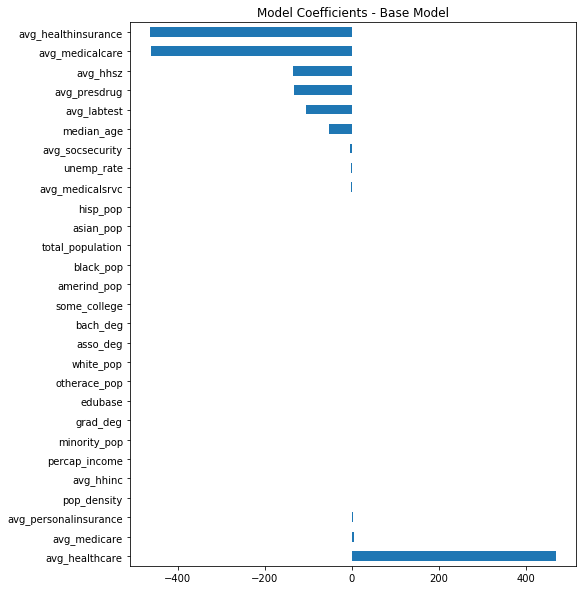

In [79]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
sm_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Base Model')

In [47]:
# Calculate RMSE of model
from statsmodels.tools.eval_measures import rmse
pred_val = sm_ols.fittedvalues.copy()
rmse_base_ols = rmse(train_y, pred_val)
round(rmse_base_ols,2)

1111.25

> Analysing the model summary, we can see that:
   - The R-squared value of 0.972 shows that 97.2% of the variability in Provider Count is explained by the model. The R-squared value is too good to be true and the model seems to be overfitting.
   - To identify variables that are statistically significant, we look at the p-values of individual variables. Among the coefficients, those that are statistically significant at 10% significance level are:  
   - asian_pop, amerind_pop, black_pop, edubase, hisp_pop, median_age, minority_pop, otherace_pop, percap_income, pop_density, white_pop, some_college, asso_deg, grad_deg, total_population, avg_labtest, avg_presdrug, avg_socsecurity.
   - The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.

#### Verify Assumptions

Here we will verify regression assumtions of:
 - Linearity
 - Independence
 - Normality
 - Equal Variance

In [33]:
# Get residual value
residual = sm_ols.resid

((array([-3.51389525, -3.27094889, -3.13664239, ...,  3.13664239,
          3.27094889,  3.51389525]),
  array([-11726.9785894 , -11413.4410947 ,  -9997.06188336, ...,
          10430.71487847,  12466.34880328,  17821.16595847])),
 (804.0708867886071, 1.483082775732784e-07, 0.7228437398916798))

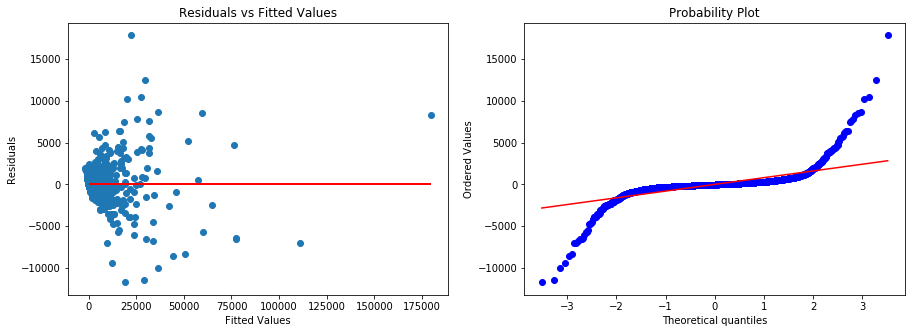

In [36]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=max(pred_val), linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we observe a departure from constant variance as the distance of data points from zero are not consistently equal. We can see that the residuals are closer to 0 in the beggining but values start to go up as we move a little towards the right of the plot.
    - **Independence**:  We see that the data is clustered together and is not randomly distributed. This indicates a departure from independence as clusters of residuals generally indicate correlation errors, or an indication that multicollinearity exists in parts of the data.


2. Probability Plot
    - **Normality**: From this plot, we can see that the residuals have tails on both the positive and negative side. Although the residuals stay close to the zero line they are heavily tailed showing violation of Normality assumption.


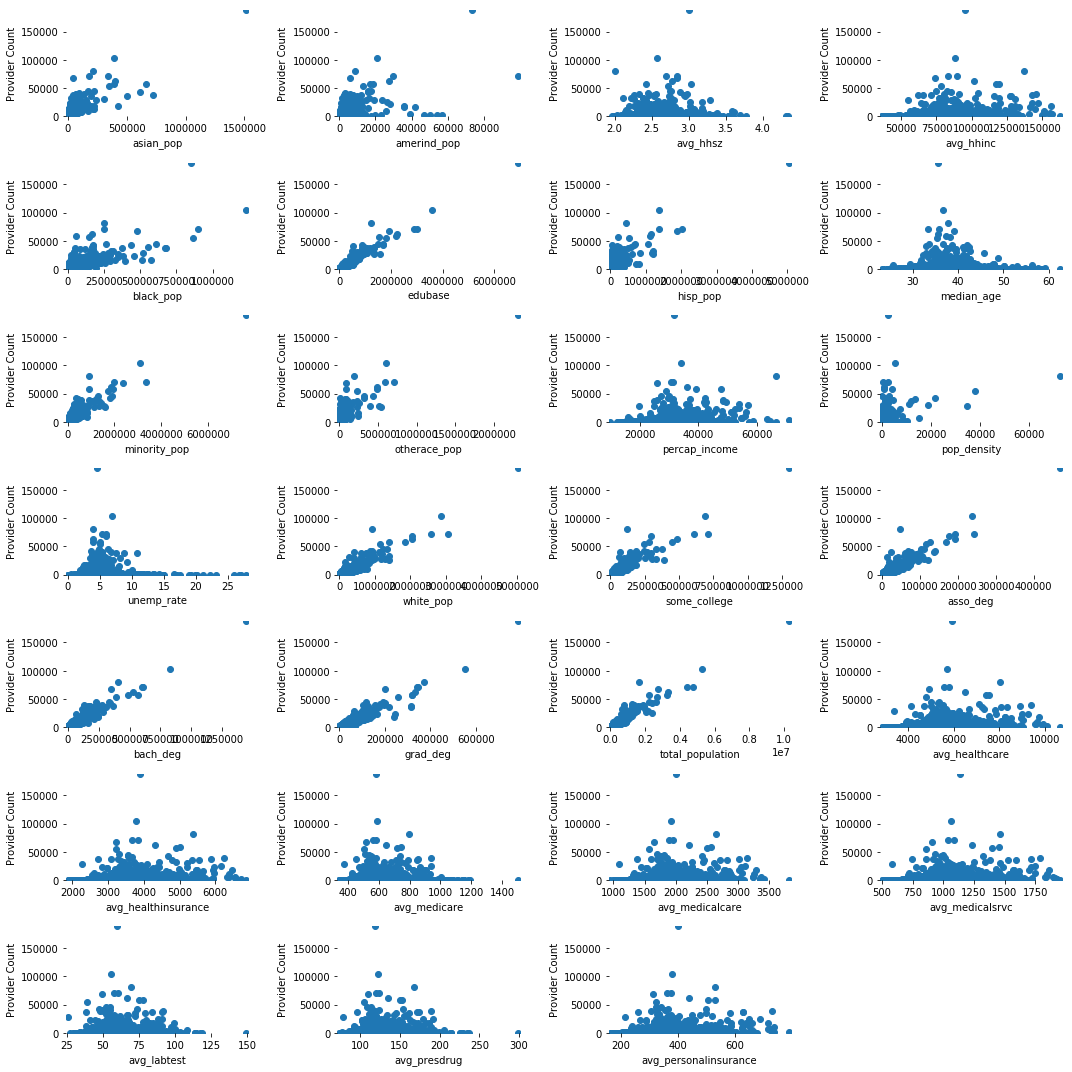

In [37]:
# Check Linearity - Plot predictors with response
states = test_newcounty_df.columns[2:-1]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(test_newcounty_df.loc[:,states[sp]], test_newcounty_df.iloc[:,-1])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Predictors vs Response
     - **Linearity** - From the plot above, we can see the each predictor variable is either strongly or weakly related to response variable. From this plot, we can say that the Linearity assumption holds.

#### Outlier Detection

One way to think about whether the results we have are driven by a given data point is to calculate how far the predicted values for data would move if model was fit without the data point in question. This calculated total distance is called Cook's distance. Cook's D is a function of the leverage and standardized residual associated with each data point. The influence of each point can be visualized using an Influence Plot.

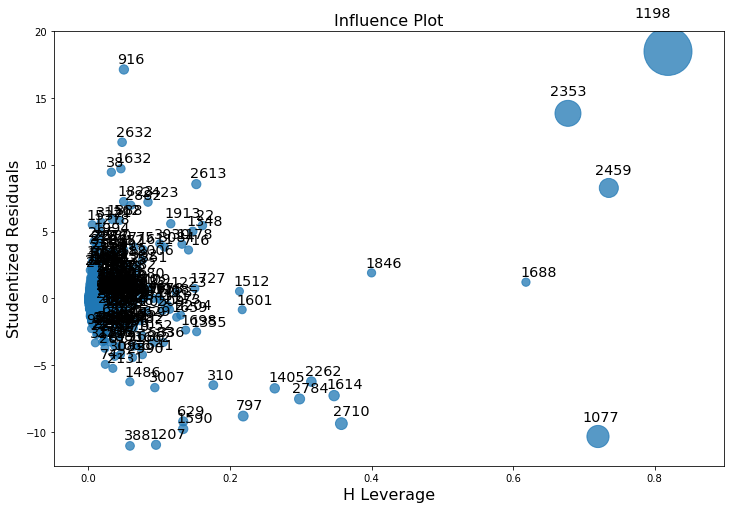

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols, ax= ax, criterion="cooks")

From this plot, we can see that points towards the right have high leverage and higher than average residuals. The size of points like 1198, 2353 is large indicating these are influential points. Points like 916 do not have a high leverage but very high residual and are considered outliers.

#### Remove Outliers

Removing outliers is an iterative process and outliers need to be investigated before removal. Here, we followed a 4-step process to remove outliers as follows:
1. Remove initial outliers based on Influence Plot
2. Rerun the model with data after removing outliers
3. Plot predictors with response to see outliers in each predictor
4. Repeat the process above until you see satisfactory results

The outliers were removed in different iterations. Here are the obervations that were removed with each iteration:
    - Iteration 1: 198,2353,2459,1077,1688
    - Iteration 2: 2262,1614,916,2710,1846,2784,1601,1405
    - Iteration 3: 1512,1727,2204,2613,1178,2632,797,1590,1052
    - Iteration 4: 716,209,583,1348,1913,1355,310,1207,388,2423
    - Iteration 5: 1659,1698,629,2646,1632,38
    
The code below shows all outliers being removed.

In [49]:
# Remove Outliers
global_df = test_newcounty_df.copy()

global_df.drop([1198,2353,2459,1077,1688,2262,1614,916,2710,1846,2784,1601,1405,1512,1727,2204,2613,
               1178,2632,797,1590,1052,716,209,583,1348,1913,1355,310,1207,388,2423,1659,1698,629,
               2646,1632,38], axis=0, inplace=True)

In [50]:
global_df.shape

(3101, 31)

##### Re-run Model

In [51]:
# Create prdictor and response variables
train_x_rerun = global_df.iloc[:,2:-1]
train_y_rerun = global_df.iloc[:,-1]
train_x_rerun.head()

asian_pop  amerind_pop  avg_hhsz  avg_hhinc  black_pop  edubase  hisp_pop  \
0       1701          423      2.85     118378      12062    65337      3945   
1          6            3      2.40      38216        895      977         8   
2        421          168      2.47      63225       1422    38284      2977   
3        258           69      2.77      60360        558    13282      1307   
4       1727          307      2.81      73754      49467    60571      9491   

   median_age  minority_pop  otherace_pop  percap_income  pop_density  \
0        41.0         20664           886          41430        440.2   
1        37.9           913             2          16066          3.4   
2        40.0          5873           882          24981        101.8   
3        40.4          2464           759          21821         81.6   
4        37.8         62154          4497          26350        692.1   

   unemp_rate  white_pop  some_college  asso_deg  bach_deg  grad_deg  \
0         5.6      75625         16211      5020     10961      8931   
1         5.2        494           199        29        50        45   
2         5.5      51908          7627      4309      3811      2153   
3         3.1      16894          2043       855       990       574   
4         6.1      31300         11944      5603     11105      5462   

   total_population  avg_healthcare  avg_healthinsurance  avg_medicare  \
0             93836         7896.60              5227.44        767.21   
1              1403         3310.96              2149.61        475.83   
2             56104         4698.76              3081.77        547.19   
3             18940         4625.75              3042.93        557.61   
4             89832         5085.66              3356.61        520.50   

   avg_medicalcare  avg_medicalsrvc  avg_labtest  avg_presdrug  \
0          2669.16          1497.17        83.06        157.57   
1          1161.34           579.97        36.65        102.27   
2          1616.99           861.89        51.40        114.41   
3          1582.82           822.59        47.81        122.89   
4          1729.05           948.00        54.48        109.17   

   avg_personalinsurance  avg_socsecurity  
0                 592.98         11766.62  
1                 191.88          3298.61  
2                 313.28          5933.05  
3                 289.06          5640.16  
4                 344.50          7113.68

In [52]:
# Run Model
X_train_rerun = train_x_rerun
X_train_rerun = sm.add_constant(X_train_rerun)
global_ols_rerun = sm.OLS(train_y_rerun, X_train_rerun).fit() 
residual = global_ols_rerun.resid

C:\Users\mohi9282\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


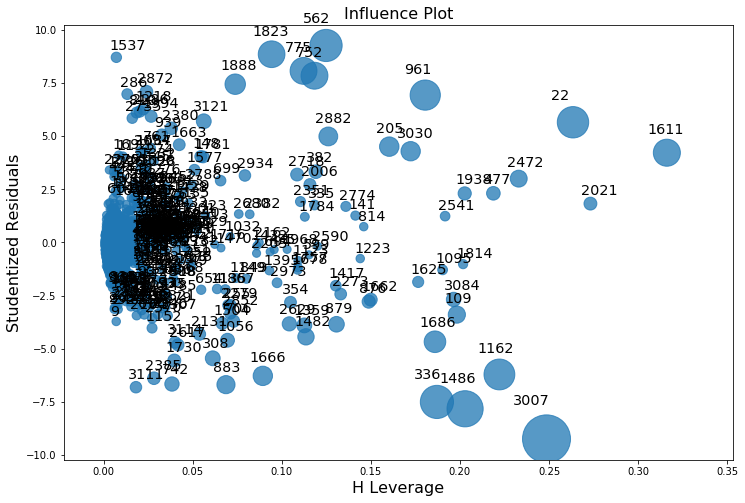

In [53]:
# Plot Outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(global_ols_rerun, ax= ax, criterion="cooks")

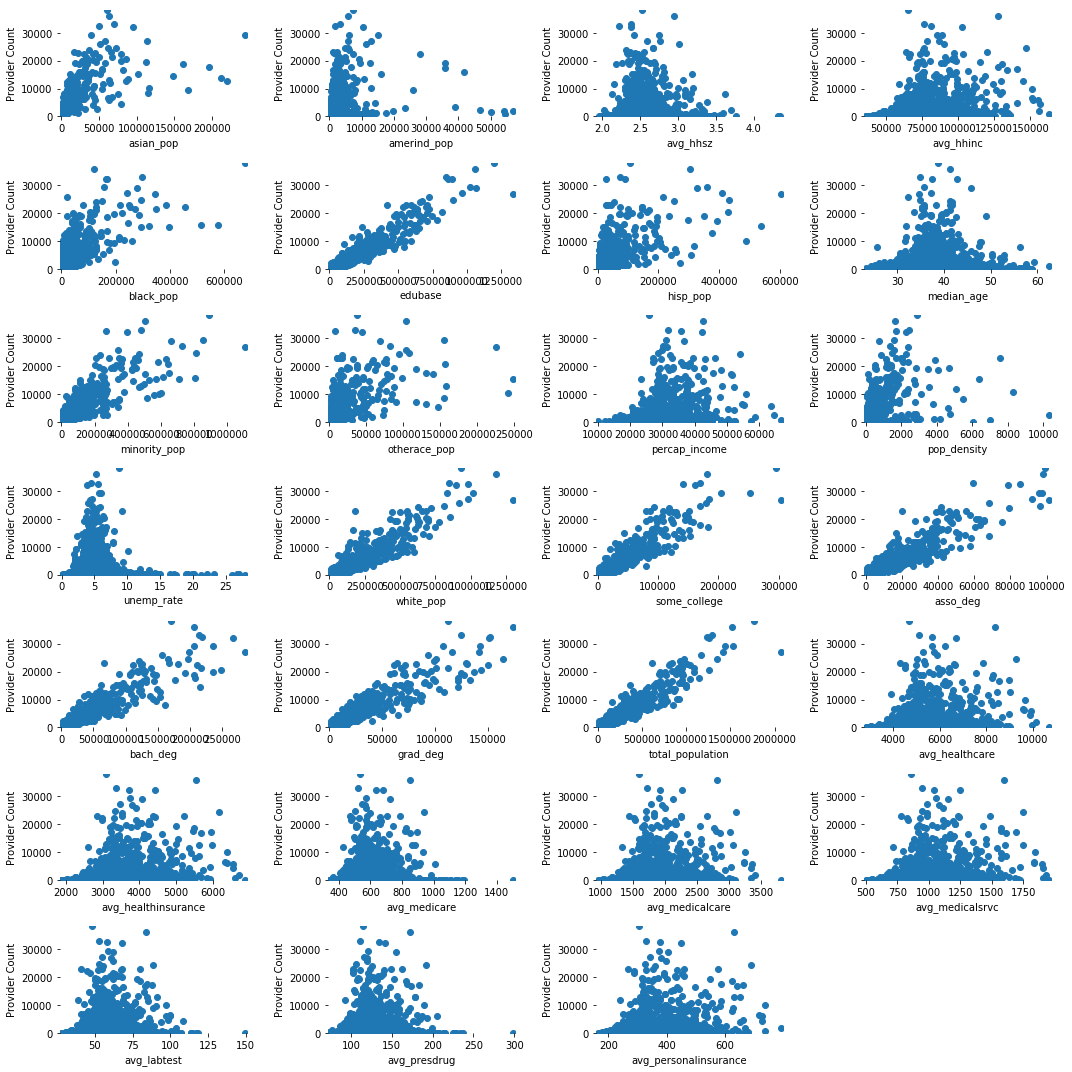

In [68]:
# Check Linearity - Plot predictors with response
states = global_df.columns[2:-1]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(global_df.loc[:,states[sp]], global_df.iloc[:,-1])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

### Feature Selection and Importance

<a name="feature"></a>
Our regression model results showed only few predictors that were statistically significant in predicting provider count. Feature selection is used to select those features in data that contribute most to the response variable. Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms. To identify which predictors play a key role and remove predictors that are not statistically significant, we can use various feature selection techniques.

Greedy algorithms like `Stepwise Regression` and `Recursive Feature Elimination (RFE)` work by adding or removing attributes one at a time and building a model on those attributes that remain. RFE algorithm recursively removes attributes and uses accuracy metric to rank the feature according to their importance.

Regularization methods like `Lasso` and `ElasticNet` seek to minimize the complexity (magnitude  and  number  of  regression  coefficients) of the model by penalizing a feature given a coefficient threshold.
 - `LASSO` penalizes the sum of absolute value of regression coefficients thereby forcing many coefficients to 0.
 
 - `ElasticNet` combines the properties of both LASSO and Ridge regression.  It penalizes the model by using both the L2-norm (sum of squared values of coefficients) and the L1-norm (sum of absolute value of coefficients) thereby shrinking some coefficients closer to 0 to reduce variance and making other coefficients 0.
 
Feature importance techniques like`Random Forest` are used to select features using a trained supervised classifier. Random forest consists of a number of decision trees where each node in a tree is a condition on a single feature, designed to split the dataset.

Here we will:
 - Run some feature selection algorithms
 - Choose an algorithm with lowest error
 - Run the chosen algorithm on all predictors
 - Choose the predictors selected by this model for further analysis

In [54]:
# Create prdictor and response variables
train_x_global = train_x_rerun
train_y_global = train_y_rerun
train_x_global.head()

asian_pop  amerind_pop  avg_hhsz  avg_hhinc  black_pop  edubase  hisp_pop  \
0       1701          423      2.85     118378      12062    65337      3945   
1          6            3      2.40      38216        895      977         8   
2        421          168      2.47      63225       1422    38284      2977   
3        258           69      2.77      60360        558    13282      1307   
4       1727          307      2.81      73754      49467    60571      9491   

   median_age  minority_pop  otherace_pop  percap_income  pop_density  \
0        41.0         20664           886          41430        440.2   
1        37.9           913             2          16066          3.4   
2        40.0          5873           882          24981        101.8   
3        40.4          2464           759          21821         81.6   
4        37.8         62154          4497          26350        692.1   

   unemp_rate  white_pop  some_college  asso_deg  bach_deg  grad_deg  \
0         5.6      75625         16211      5020     10961      8931   
1         5.2        494           199        29        50        45   
2         5.5      51908          7627      4309      3811      2153   
3         3.1      16894          2043       855       990       574   
4         6.1      31300         11944      5603     11105      5462   

   total_population  avg_healthcare  avg_healthinsurance  avg_medicare  \
0             93836         7896.60              5227.44        767.21   
1              1403         3310.96              2149.61        475.83   
2             56104         4698.76              3081.77        547.19   
3             18940         4625.75              3042.93        557.61   
4             89832         5085.66              3356.61        520.50   

   avg_medicalcare  avg_medicalsrvc  avg_labtest  avg_presdrug  \
0          2669.16          1497.17        83.06        157.57   
1          1161.34           579.97        36.65        102.27   
2          1616.99           861.89        51.40        114.41   
3          1582.82           822.59        47.81        122.89   
4          1729.05           948.00        54.48        109.17   

   avg_personalinsurance  avg_socsecurity  
0                 592.98         11766.62  
1                 191.88          3298.61  
2                 313.28          5933.05  
3                 289.06          5640.16  
4                 344.50          7113.68

In [55]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### Run Feature Selection Algorithms

In [56]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [57]:
# Create Pipeline and Standardize the dataset
clf = LinearRegression()
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso(max_iter=10000))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledRFECV', Pipeline([('Scaler', StandardScaler()),('RFECV',RFECV(estimator=clf, cv=5))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators = 100))])))

In [58]:
# Run models
import math
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x_global, train_y_global, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)
#     print("RMSE: %.3f" % (math.sqrt(abs(cv_results.mean()))))

ScaledLASSO: 752.752557 (158993.463508)
ScaledEN: 911.747735 (275002.378350)
ScaledRFECV: 749.793326 (124677.822185)
ScaledRF: 796.890772 (182829.371659)


From the results above, Lasso seems to be the most promising with lowest RMSE. Let's explore Lasso to see which variables are selected by this model.

#### Identify Features Using Lasso

In [59]:
# Standardize the data using Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_global)

In [60]:
# Run Lasso Model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
lasso_model=Lasso(max_iter=10000)
lasso_model.fit(train_x_std,train_y_global)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
# Identify how many variables are picked
coef = pd.Series(lasso_model.coef_, index = train_x.columns)
print("Model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Model picked 20 variables and eliminated the other 8 variables


In [62]:
# Get important variables and their coefficients
imp_coef = pd.concat([coef.sort_values(ascending=False).head(10),
                     coef.sort_values(ascending=False).tail(10)])
imp_coef

minority_pop        4581.381029
grad_deg            2293.551875
total_population    1555.264883
percap_income        645.684515
avg_medicare         522.336227
asso_deg             477.124062
edubase              467.544842
otherace_pop         194.044098
pop_density          116.152481
avg_hhsz              28.637549
unemp_rate           -39.235521
amerind_pop          -79.276157
some_college        -140.899712
median_age          -183.858114
avg_presdrug        -484.287719
avg_socsecurity     -906.066613
asian_pop          -1100.244169
bach_deg           -1241.042531
black_pop          -2003.848056
hisp_pop           -2534.668761
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

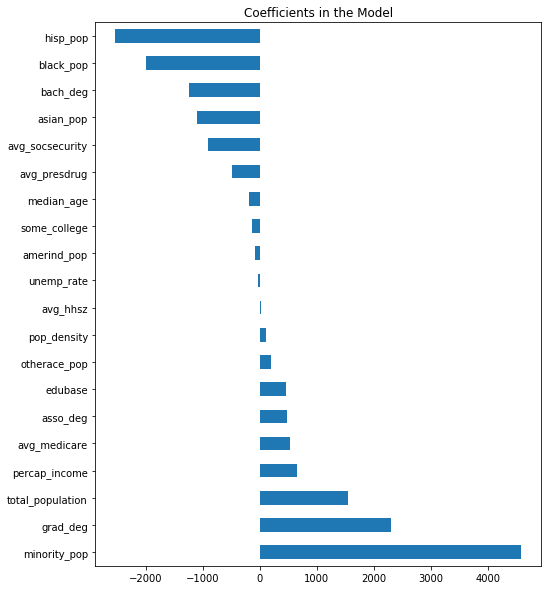

In [63]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

From the analysis above, we can see that factors that are predictive of higher provider count are:
- minority_pop (2018 Minority Population (Esri))
- grad_deg (2018 Education: Graduate/Professional Degree (Esri))
- total_population (2018 Total Population (Esri))
- percap_income (2018 Per Capita Income (Esri))
- avg_medicare (2019 Medicare Payments: Average)
- asso_deg (2018 Education: Associate's Degree (Esri))
- edubase (2018 Educational Attainment Base (Esri))
- otherace_pop (2018 Other Race Population by Age Base (Esri))
- pop_density (2018 Population Density (Pop per Square Mile) (Esri))
- avg_hhsz (2018 Average Household Size (Esri))

Factors that negatively influence provider count are:
- hisp_pop (2018 Hispanic Population (Esri))
- black_pop (2018 Black/African American Population (Esri))
- bach_deg (2018 Education: Bachelor's Degree (Esri))
- asian_pop (2018 Asian Population (Esri))
- avg_socsecurity (2019 Pensions & Social Security: Average)
- avg_presdrug (2019 Prescription Drugs: Average)
- median_age (2018 Median Age (Esri))
- some_college (2018 Education: Some College/No Degree (Esri))
- amerind_pop (2018 American Indian/Alaska Native Population (Esri))
- unemp_rate (2018 Unemployment Rate (Esri))

### Regression with Selected Features

<a name="reg"></a>
In the base model, we saw deviations from linearity, constant variance and independence assumptions. The model also seemed to overfit data with an R-squared value of 0.97. 

__For Linearity__ - If a model does not fit well, it does not mean that the regression is not useful. One problem could be that the relation between one or more predictors and the response is not linear.

__For Constant Variance and Independence__ - If normality or the constant variance do not hold, then we transform the response variable. A common transformation is the power transformation of y to the lambda, also called the Box-Cox transformation.

Here we will use the features selected by lasso model, and transform both the predictor and response to create a regression model on our data.

#### Clean the Data
Some transformations such as `log` do not work well with zero or negative values. We do not have any negatives but let's check and remove any zero values from the data.

In [64]:
# Create a copy of dataframe
test_log = global_df.copy()
test_log.shape

(3101, 31)

In [65]:
# Describe to identify any zero values in dataset
test_log.describe()

asian_pop   amerind_pop     avg_hhsz      avg_hhinc      black_pop  \
count    3101.000000   3101.000000  3101.000000    3101.000000    3101.000000   
mean     3043.151242    864.783618     2.482086   66002.362786   10189.781683   
std     13248.037233   3068.730232     0.215989   15607.249326   36295.673303   
min         0.000000      0.000000     1.960000   36078.000000       0.000000   
25%        48.000000     61.000000     2.350000   55820.000000     120.000000   
50%       160.000000    159.000000     2.460000   63394.000000     821.000000   
75%       785.000000    515.000000     2.570000   72034.000000    5462.000000   
max    244129.000000  56871.000000     4.340000  162801.000000  675982.000000   

            edubase       hisp_pop   median_age  minority_pop   otherace_pop  \
count  3.101000e+03    3101.000000  3101.000000  3.101000e+03    3101.000000   
mean   5.552161e+04   10626.053531    41.988746  2.625575e+04    4068.765882   
std    1.138470e+05   37604.683153     5.352596  7.729349e+04   14823.385839   
min    6.900000e+01       0.000000    23.200000  4.000000e+00       0.000000   
25%    7.873000e+03     376.000000    38.800000  1.265000e+03     108.000000   
50%    1.831000e+04    1113.000000    41.900000  4.426000e+03     416.000000   
75%    4.616100e+04    5102.000000    45.200000  1.487400e+04    1934.000000   
max    1.334604e+06  602482.000000    62.500000  1.106776e+06  248928.000000   

       percap_income   pop_density   unemp_rate     white_pop   some_college  \
count    3101.000000   3101.000000  3101.000000  3.101000e+03    3101.000000   
mean    26313.777814    182.966978     4.614060  6.046337e+04   11695.798452   
std      6023.207001    545.774159     2.549695  1.143972e+05   23569.596556   
min      9853.000000      0.000000     0.000000  6.500000e+01      22.000000   
25%     22211.000000     16.900000     2.900000  8.891000e+03    1661.000000   
50%     25451.000000     45.200000     4.300000  2.134200e+04    3821.000000   
75%     29223.000000    112.900000     5.800000  5.485100e+04   10023.000000   
max     66766.000000  10328.300000    27.900000  1.297766e+06  303602.000000   

            asso_deg       bach_deg       grad_deg  total_population  \
count    3101.000000    3101.000000    3101.000000      3.101000e+03   
mean     4915.803612   10485.605611    6346.259594      8.125251e+04   
std      9843.448716   26386.076833   16755.744154      1.679167e+05   
min         5.000000       2.000000       0.000000      8.200000e+01   
25%       645.000000     846.000000     418.000000      1.119700e+04   
50%      1583.000000    2102.000000    1124.000000      2.603300e+04   
75%      4381.000000    6404.000000    3687.000000      6.701100e+04   
max    101287.000000  285839.000000  173811.000000      2.071433e+06   

       avg_healthcare  avg_healthinsurance  avg_medicare  avg_medicalcare  \
count     3101.000000          3101.000000   3101.000000      3101.000000   
mean      5074.480206          3315.863167    628.323805      1758.617036   
std        943.178634           621.884213    110.378592       322.920403   
min       2821.510000          1871.500000    342.050000       950.010000   
25%       4436.310000          2898.900000    557.340000      1540.780000   
50%       4925.090000          3221.310000    610.370000      1704.850000   
75%       5557.760000          3628.930000    681.850000      1920.150000   
max      10690.410000          6873.420000   1501.330000      3816.990000   

       avg_medicalsrvc  avg_labtest  avg_presdrug  avg_personalinsurance  \
count      3101.000000  3101.000000   3101.000000            3101.000000   
mean        925.907240    57.210451    131.257604             326.426227   
std         185.229135    12.361968     21.018558              74.473635   
min         496.890000    27.750000     73.650000             162.690000   
25%         799.940000    49.010000    117.910000             276.300000   
50%         896.820000    54.780000    1

We can see that the minimum for asian, black population and some other variables is 0. Let's find out the observations with these zero values and remove them.

In [66]:
# Find observations that have 0 values
state_list = ['asian_pop','black_pop','amerind_pop','hisp_pop','otherace_pop','pop_density','unemp_rate','grad_deg']
x = test_log[(test_log[state_list] == 0).any(axis=1)]
x.shape

(50, 31)

We can see that 50 out of 3101 observations have 0 values. We will go ahead and remove these.

Replace 0 values with Nan and then drop those values

In [69]:
# Replace 0 with NaN
test_log['black_pop'].replace(0.0, np.nan, inplace=True)
test_log['asian_pop'].replace(0.0, np.nan, inplace=True)
test_log['amerind_pop'].replace(0.0, np.nan, inplace=True)
test_log['hisp_pop'].replace(0.0, np.nan, inplace=True)
test_log['otherace_pop'].replace(0.0, np.nan, inplace=True)
test_log['pop_density'].replace(0.0, np.nan, inplace=True)
test_log['unemp_rate'].replace(0.0, np.nan, inplace=True)
test_log['grad_deg'].replace(0.0, np.nan, inplace=True)

# Drop NaN
test_log.dropna(inplace=True)
test_log.shape

(3051, 31)

In [70]:
test_log.head()

state            county  asian_pop  amerind_pop  avg_hhsz  avg_hhinc  \
0    MD    Calvert County     1701.0        423.0      2.85     118378   
1    MS  Issaquena County        6.0          3.0      2.40      38216   
2    OH     Seneca County      421.0        168.0      2.47      63225   
3    GA      Banks County      258.0         69.0      2.77      60360   
4    GA   Rockdale County     1727.0        307.0      2.81      73754   

   black_pop  edubase  hisp_pop  median_age  minority_pop  otherace_pop  \
0    12062.0    65337    3945.0        41.0         20664         886.0   
1      895.0      977       8.0        37.9           913           2.0   
2     1422.0    38284    2977.0        40.0          5873         882.0   
3      558.0    13282    1307.0        40.4          2464         759.0   
4    49467.0    60571    9491.0        37.8         62154        4497.0   

   percap_income  pop_density  unemp_rate  white_pop  some_college  asso_deg  \
0          41430        440.2         5.6      75625         16211      5020   
1          16066          3.4         5.2        494           199        29   
2          24981        101.8         5.5      51908          7627      4309   
3          21821         81.6         3.1      16894          2043       855   
4          26350        692.1         6.1      31300         11944      5603   

   bach_deg  grad_deg  total_population  avg_healthcare  avg_healthinsurance  \
0     10961    8931.0             93836         7896.60              5227.44   
1        50      45.0              1403         3310.96              2149.61   
2      3811    2153.0             56104         4698.76              3081.77   
3       990     574.0             18940         4625.75              3042.93   
4     11105    5462.0             89832         5085.66              3356.61   

   avg_medicare  avg_medicalcare  avg_medicalsrvc  avg_labtest  avg_presdrug  \
0        767.21          2669.16          1497.17        83.06        157.57   
1        475.83          1161.34           579.97        36.65        102.27   
2        547.19          1616.99           861.89        51.40        114.41   
3        557.61          1582.82           822.59        47.81        122.89   
4        520.50          1729.05           948.00        54.48        109.17   

   avg_personalinsurance  avg_socsecurity  provider_count  
0                 592.98         11766.62          1044.0  
1                 191.88          3298.61             5.0  
2                 313.28          5933.05           621.0  
3                 289.06          5640.16            79.0  
4                 344.50          7113.68          1210.0

In [71]:
test_log.describe()

asian_pop   amerind_pop     avg_hhsz      avg_hhinc      black_pop  \
count    3051.000000   3051.000000  3051.000000    3051.000000    3051.000000   
mean     3092.947230    876.815143     2.485038   66020.450016   10356.214028   
std     13350.425949   3091.472766     0.214153   15610.312684   36568.473041   
min         1.000000      1.000000     1.960000   36078.000000       1.000000   
25%        51.000000     64.000000     2.360000   55852.500000     131.500000   
50%       166.000000    165.000000     2.460000   63434.000000     874.000000   
75%       806.000000    525.000000     2.570000   72082.000000    5586.500000   
max    244129.000000  56871.000000     4.340000  162801.000000  675982.000000   

            edubase       hisp_pop   median_age  minority_pop   otherace_pop  \
count  3.051000e+03    3051.000000  3051.000000  3.051000e+03    3051.000000   
mean   5.641380e+04   10797.964930    41.889708  2.668070e+04    4134.707637   
std    1.145610e+05   37887.459001     5.288600  7.785250e+04   14935.359941   
min    4.440000e+02       2.000000    23.200000  1.400000e+01       1.000000   
25%    8.347000e+03     392.000000    38.750000  1.346000e+03     116.000000   
50%    1.874200e+04    1167.000000    41.800000  4.592000e+03     434.000000   
75%    4.695250e+04    5234.500000    45.050000  1.521600e+04    2002.000000   
max    1.334604e+06  602482.000000    62.500000  1.106776e+06  248928.000000   

       percap_income   pop_density   unemp_rate     white_pop   some_college  \
count    3051.000000   3051.000000  3051.000000  3.051000e+03    3051.000000   
mean    26283.484431    185.927991     4.634382  6.143375e+04   11883.274664   
std      6005.720782    549.734794     2.525709  1.150775e+05   23716.064900   
min      9853.000000      0.100000     0.100000  2.050000e+02     107.000000   
25%     22177.000000     18.100000     3.000000  9.332500e+03    1737.000000   
50%     25428.000000     46.300000     4.300000  2.196400e+04    3908.000000   
75%     29225.000000    114.850000     5.800000  5.656400e+04   10239.500000   
max     66766.000000  10328.300000    27.900000  1.297766e+06  303602.000000   

            asso_deg       bach_deg       grad_deg  total_population  \
count    3051.000000    3051.000000    3051.000000      3.051000e+03   
mean     4994.676827   10654.960341    6449.253032      8.255954e+04   
std      9904.334750   26568.008703   16873.036763      1.689741e+05   
min         5.000000      38.000000      11.000000      6.230000e+02   
25%       680.000000     892.000000     439.500000      1.175300e+04   
50%      1631.000000    2170.000000    1177.000000      2.670500e+04   
75%      4463.000000    6579.000000    3808.000000      6.775850e+04   
max    101287.000000  285839.000000  173811.000000      2.071433e+06   

       avg_healthcare  avg_healthinsurance  avg_medicare  avg_medicalcare  \
count     3051.000000          3051.000000   3051.000000      3051.000000   
mean      5066.632448          3311.393602    626.172353      1755.238846   
std        934.090435           616.772198    107.326660       318.869114   
min       2821.510000          1871.500000    342.050000       950.010000   
25%       4434.325000          2895.460000    556.045000      1539.220000   
50%       4919.190000          3218.300000    608.600000      1703.870000   
75%       5551.010000          3625.890000    679.610000      1917.820000   
max      10125.260000          6711.290000   1192.230000      3413.960000   

       avg_medicalsrvc  avg_labtest  avg_presdrug  avg_personalinsurance  \
count      3051.000000  3051.000000   3051.000000            3051.000000   
mean        924.490957    56.973950    130.883910             326.086522   
std         183.800551    12.022061     20.479074              74.255805   
min         496.890000    27.750000     73.650000             162.690000   
25%         799.640000    48.930000    117.770000             276.060000   
50%         895.550000    54.720000    1

Now that 0 valued observations are removed, we can see that minimum value is 1.

#### Transform Data

In [72]:
# Subset important predictors chosen from Lasso Model
train_x_lasso = test_log.loc[:,imp_coef.index]
train_y_lasso = test_log.iloc[:,-1]
train_x_lasso.head()

minority_pop  grad_deg  total_population  percap_income  avg_medicare  \
0         20664    8931.0             93836          41430        767.21   
1           913      45.0              1403          16066        475.83   
2          5873    2153.0             56104          24981        547.19   
3          2464     574.0             18940          21821        557.61   
4         62154    5462.0             89832          26350        520.50   

   asso_deg  edubase  otherace_pop  pop_density  avg_hhsz  unemp_rate  \
0      5020    65337         886.0        440.2      2.85         5.6   
1        29      977           2.0          3.4      2.40         5.2   
2      4309    38284         882.0        101.8      2.47         5.5   
3       855    13282         759.0         81.6      2.77         3.1   
4      5603    60571        4497.0        692.1      2.81         6.1   

   amerind_pop  some_college  median_age  avg_presdrug  avg_socsecurity  \
0        423.0         16211        41.0        157.57         11766.62   
1          3.0           199        37.9        102.27          3298.61   
2        168.0          7627        40.0        114.41          5933.05   
3         69.0          2043        40.4        122.89          5640.16   
4        307.0         11944        37.8        109.17          7113.68   

   asian_pop  bach_deg  black_pop  hisp_pop  
0     1701.0     10961    12062.0    3945.0  
1        6.0        50      895.0       8.0  
2      421.0      3811     1422.0    2977.0  
3      258.0       990      558.0    1307.0  
4     1727.0     11105    49467.0    9491.0

In [73]:
# Transform data
from numpy import log
sc_data = StandardScaler()
train_x_log = np.log(train_x_lasso)
train_y_log = np.log(test_log.iloc[:,-1])

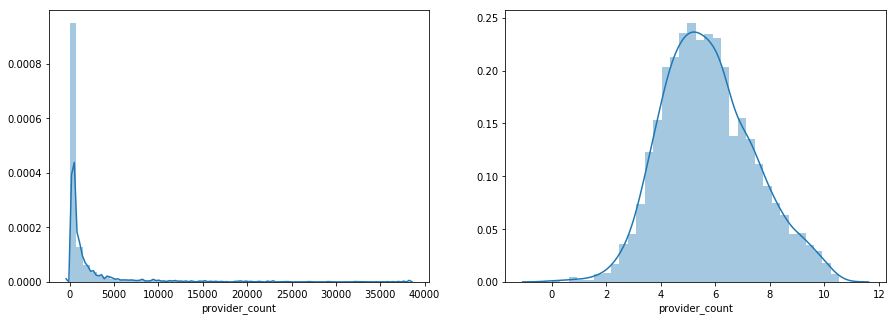

In [74]:
# Distribution of Dependent variable before and after transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_y_log, ax=ax2)
sns.distplot(train_y_lasso, ax=ax1)

From the plots above, we can see how the distribution of provider count varies before and after log transformation.

#### Run Global Model

In this model, we will build an Ordinary Least Squares (OLS) Regression Model using predictors selected from feature selection

In [75]:
X_train_log = sm.add_constant(train_x_log)
global_ols = sm.OLS(train_y_log, X_train_log).fit() 

C:\Users\mohi9282\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
global_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         provider_count   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:21:48   Log-Likelihood:                -1377.4
No. Observations:                3051   AIC:                             2797.
Df Residuals:                    3030   BIC:                             2923.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9134      1.507     -2.597      0.009      -6.869      -0.958
minority_pop         0.2005      0.023      8.909      0.000       0.156       0.245
grad_deg             0.2312      0.027      8.644      0.000       0.179       0.284
total_population     0.7350      0.363      2.027      0.043       0.024       1.446
percap_income        0.8371      0.274      3.055      0.002       0.300       1.374
avg_medicare         3.8329      0.630      6.086      0.000       2.598       5.068
asso_deg             0.0806      0.027      3.005      0.003       0.028       0.133
edubase              0.0355      0.350      0.101      0.919      -0.651       0.722
otherace_pop         0.0412      0.016      2.580      0.010       0.010       0.073
pop_density         -0.0127      0.010     -1.280      0.201      -0.032       0.007
avg_hhsz            -2.1234      0.288     -7.368      0.000      -2.688      -1.558
unemp_rate           0.0070      0.016      0.427      0.669      -0.025       0.039
amerind_pop          0.0544      0.009      6.106      0.000       0.037       0.072
some_college        -0.0391      0.048     -0.819      0.413      -0.133       0.054
median_age          -0.9313      0.211     -4.420      0.000      -1.344      -0.518
avg_presdrug        -4.5444      0.659     -6.898      0.000      -5.836      -3.253
avg_socsecurity     -0.7842      0.247     -3.172      0.002      -1.269      -0.300
asian_pop            0.0640      0.012      5.433      0.000       0.041       0.087
bach_deg             0.0202      0.039      0.516      0.606      -0.057       0.097
black_pop           -0.1044      0.010    -10.091      0.000      -0.125      -0.084
hisp_pop            -0.1451      0.022     -6.538      0.000      -0.189      -0.102
==============================================================================
Omnibus:                      184.389   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              736.772
Skew:                           0.134   Prob(JB):                    1.03e-160
Kurtosis:                       5.393   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Analysing the model summary, we can see that:
- The Adjusted R2 of our global model is 94.9% which means that 94.9% of variation in provider count can be explained by our model.
- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.
- The p-values of individual variables determine which variables are statistically significant. The equation below is the final regression equation for our model showing statistically significant variables and their coefficients. Note that both dependent and independent variables are log transformed.

Text(0.5, 1.0, 'Model Coefficients - Global Model')

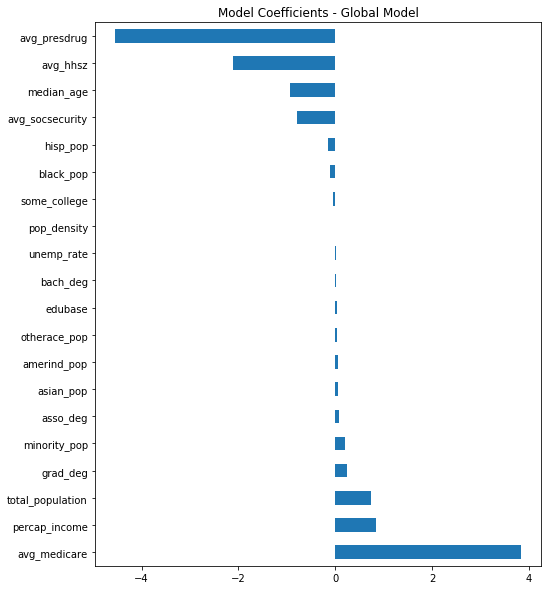

In [78]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
global_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Global Model')

__Regression Equation__

$
\begin{align}
provider\_count = 0.2005*minority\_pop + 0.2312*grad\_deg + 0.7350*total\_population + 0.8371*percap\_income \\ + 3.8329*avg\_medicare + 0.0806*asso\_deg + 0.0412*otherace\_pop + 0.0544*amerind\_pop +0.0640*asian\_pop \\ - 2.1234*avg\_hhsz - 0.9313*median\_age - 4.5444*avg\_presdrug - 0.7842*avg\_socsecurity-0.1044*black\_pop-0.1451*hisp\_pop
\end{align}
$

In [83]:
# Model Interpretation
coef = 0.2312
((1.01**coef)-1)*100

0.23031647116877885

> __Model Interpretations:__
1. `𝑚𝑖𝑛𝑜𝑟𝑖𝑡𝑦_𝑝𝑜𝑝` - The coefficient is 0.2005. We can say that for 1% increase in minority population, Provider Count will increase by 0.20% ((1.01^coef-1)*100) holding all other predictors fixed.
2. `grad_deg` - The coefficient is 0.2312. We can say that for 1% increase in graduate degree holders, Provider Count will increase by 0.23% holding all other predictors fixed.
3. `𝑡𝑜𝑡𝑎𝑙_𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛` - The coefficient is 0.735. We can say that for 1% increase in total population, Provider Count will increase by 0.735% holding all other predictors fixed.
4. `𝑝𝑒𝑟𝑐𝑎𝑝_𝑖𝑛𝑐𝑜𝑚𝑒` - The coefficient is 0.8371. We can say that for 1% increase in per capita income, Provider Count will increase by 0.84% holding all other predictors fixed.
5. `𝑎𝑣𝑔_𝑚𝑒𝑑𝑖𝑐𝑎𝑟𝑒` - The coefficient is 3.8329. We can say that for 1% increase in average medicare, Provider Count will increase by 3.83% holding all other predictors fixed.
6. `𝑎𝑠𝑠𝑜_𝑑𝑒𝑔` - The coefficient is 0.0806. We can say that for 1% increase in associate degree holders, Provider Count will increase by 0.08% holding all other predictors fixed.
7. `otherace_pop` - The coefficient is 0.0412. We can say that for 1% increase in other race population, Provider Count will increase by 0.04% holding all other predictors fixed.
8. `𝑎𝑚𝑒𝑟𝑖𝑛𝑑_𝑝𝑜𝑝` - The coefficient is 0.0544. We can say that for 1% increase in american indian population, Provider Count will increase by 0.05% holding all other predictors fixed.
9. `asian_pop` - The coefficient is 0.0640. We can say that for 1% increase in asian population, Provider Count will increase by 0.06% holding all other predictors fixed.
10. `avg_hhsz` - The coefficient is -2.1234. We can say that for 1% increase in average household size, Provider Count will decrease by 2.12% holding all other predictors fixed.
11. `median_age` - The coefficient is -0.9313. We can say that for 1% increase in median age, Provider Count will decrease by 0.93% holding all other predictors fixed.
12. `𝑎𝑣𝑔_𝑝𝑟𝑒𝑠𝑑𝑟𝑢𝑔` - The coefficient is -4.5444. We can say that for 1% increase in average prescription drug, Provider Count will decrease by 4.54% holding all other predictors fixed.
13. `𝑎𝑣𝑔_𝑠𝑜𝑐𝑠𝑒𝑐𝑢𝑟𝑖𝑡𝑦` - The coefficient is -0.7842. We can say that for 1% increase in average social security, Provider Count will decrease by 0.784% holding all other predictors fixed.
14. `black_pop` - The coefficient is -0.1044. We can say that for 1% increase in black population, Provider Count will decrease by 0.104% holding all other predictors fixed.
15. `ℎ𝑖𝑠𝑝_𝑝𝑜𝑝` - The coefficient is -0.1451. We can say that for 1% increase in hispanic population, Provider Count will decrease by 0.145% holding all other predictors fixed.

source for interpretation: https://www.cscu.cornell.edu/news/statnews/stnews83.pdf

In [234]:
# Calculate RMSE of global model
pred_val = global_ols.fittedvalues.copy()
new_rmse = rmse(train_y_log, pred_val)
new_rmse

0.3800372871729872

> We can see that the RMSE of our model is 0.38. Since RMSE has the same unit as the dependent variable, we can compare RMSE with the range of dependent variable to see how spread out our residuals are and see how fit our model is. A value of 0.38 on a range of 0-11 (dependent variable range) is pretty small showing the model is a good fit.

In [82]:
# Get confidence intervals
global_ols.conf_int(alpha=0.05, cols=None)

0         1
const            -6.868556 -0.958190
minority_pop      0.156339  0.244577
grad_deg          0.178792  0.283694
total_population  0.023936  1.446038
percap_income     0.299851  1.374267
avg_medicare      2.598019  5.067868
asso_deg          0.028011  0.133201
edubase          -0.651444  0.722358
otherace_pop      0.009894  0.072566
pop_density      -0.032128  0.006754
avg_hhsz         -2.688412 -1.558297
unemp_rate       -0.025124  0.039131
amerind_pop       0.036935  0.071877
some_college     -0.132720  0.054496
median_age       -1.344468 -0.518174
avg_presdrug     -5.836221 -3.252572
avg_socsecurity  -1.268895 -0.299506
asian_pop         0.040885  0.087064
bach_deg         -0.056553  0.096910
black_pop        -0.124698 -0.084122
hisp_pop         -0.188608 -0.101580

#### Verify Assumptions

Here we will verify regression assumptions again

In [236]:
# Residual Value
residual = global_ols.resid

((array([-3.50633551, -3.26289977, -3.12829611, ...,  3.12829611,
          3.26289977,  3.50633551]),
  array([-1.54196948, -1.51477397, -1.41796307, ...,  2.07337864,
          2.26249409,  2.45414794])),
 (0.37607418538756043, -8.803264389777603e-15, 0.9885455350676211))

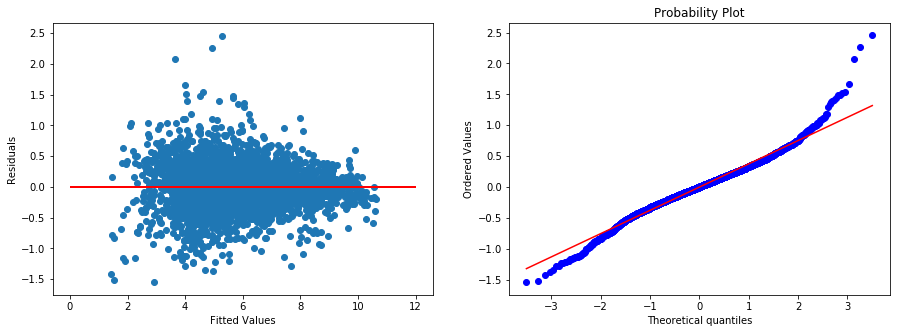

In [237]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=12, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

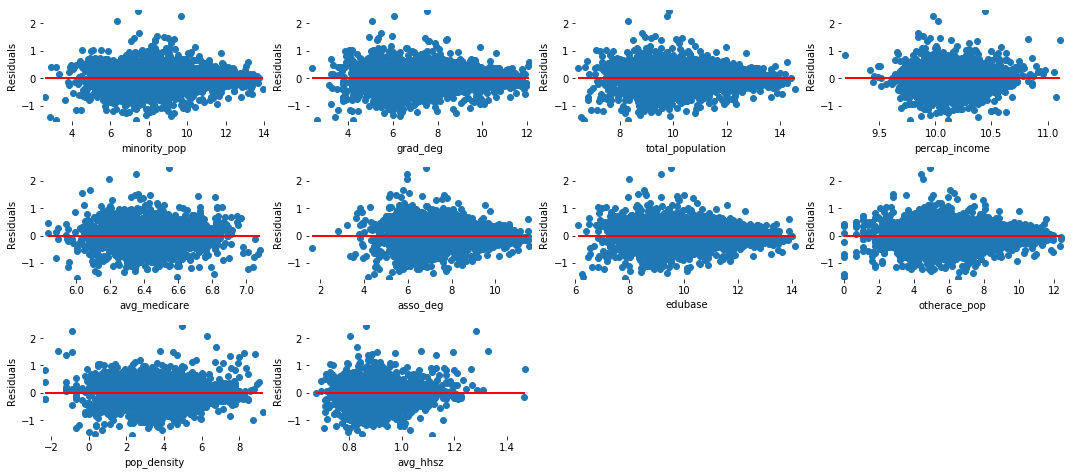

In [238]:
# Residuals vs Predictors
states = train_x_log.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(train_x_log.loc[:,states[sp]])
    maxi = max(train_x_log.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_log.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we still observe a departure from constant variance as the distance of data points from zero line is not consistent. We can see that the variation in residuals is high initially and then starts to drop.
    - **Independence**:  We see that the data is randomly distributed along the zero line indicating the independence holds.


2. Probability Plot
    - **Normality**: From this plot, we see that the residuals follow straight line with departure at the tails. Normality assumption does not hold.


3. Residuals vs Predictors Plot
    - **Linearity**: From the plot, we can see that the residuals for each predictor variable are randomly distributed accross the 0 line. We can say that the linearity assumption holds.

## Geographically Weighted Regression (GWR) Model

The global model helps us identify a relationship between predictor variables and provider count at the country level. However, the dynamics of how different variables impact provider count can be very different for different counties within a state. The question we ask here is:

`What if an influential variable's impact on provider count varies accross different counties, i.e. how does average household size (or any other variable's) impact provider count vary across different counties?`

To answer this question we will explore `Geographically Weighted Regression Model`. 

Learn more about [Geographically Weighted Regression](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/geographicallyweightedregression.htm).

### Run GWR Model

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

In [5]:
from arcpy.stats import GeographicallyWeightedRegression

In [16]:
import arcpy
arcpy.stats.GWR(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                "provider_count", "CONTINUOUS", "asian_pop;amerind_pop;avg_hhsz;black_pop;hisp_pop;median_age;minority_pop; otherace_pop;percap_income;unemp_rate;white_pop;some_college;grad_deg;avg_healthinsurance; avg_medicare;avg_labtest;avg_presdrug;avg_personalinsurance", 
                r"C:\Users\mohi9282\Desktop\arcgis\GWR_results\GWR_results.gdb\GWR_result_NB",
                "NUMBER_OF_NEIGHBORS", "USER_DEFINED", None, None, None, None, None, None, None, 50,
                None, None, None, None, "ROBUST", "GAUSSIAN", None)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\GWR_results\\GWR_results.gdb\\GWR_result_NB'>

### Access GWR Results as Spatially Enabled Dataframe

In [14]:
# Access GWR data from local
gwr_df = pd.DataFrame.spatial.from_featureclass(r'C:/Users/mohi9282/Desktop/arcgis/GWR_results/GWR_results.gdb/GWR_result_NB')
gwr_df.head()

OBJECTID  SOURCE_ID  provider_count  asian_pop  amerind_pop  avg_hhsz  \
0         1          1          1044.0       1701          423      2.85   
1         2          2             5.0          6            3      2.40   
2         3          3           621.0        421          168      2.47   
3         4          4            79.0        258           69      2.77   
4         5          5          1210.0       1727          307      2.81   

   black_pop  hisp_pop  median_age  minority_pop  otherace_pop  percap_income  \
0      12062      3945        41.0         20664           886          41430   
1        895         8        37.9           913             2          16066   
2       1422      2977        40.0          5873           882          24981   
3        558      1307        40.4          2464           759          21821   
4      49467      9491        37.8         62154          4497          26350   

   unemp_rate  white_pop  some_college  grad_deg  avg_healthinsurance  \
0         5.6      75625         16211      8931              5227.44   
1         5.2        494           199        45              2149.61   
2         5.5      51908          7627      2153              3081.77   
3         3.1      16894          2043       574              3042.93   
4         6.1      31300         11944      5462              3356.61   

   avg_medicare  avg_labtest  avg_presdrug  avg_personalinsurance  \
0        767.21        83.06        157.57                 592.98   
1        475.83        36.65        102.27                 191.88   
2        547.19        51.40        114.41                 313.28   
3        557.61        47.81        122.89                 289.06   
4        520.50        54.48        109.17                 344.50   

       INTRCPT   SE_INTRCPT  C_ASIAN_POP  SE_ASIAN_POP  C_AMERIND_POP  \
0  7003.973124  2141.366259     0.310256      0.033458       1.097271   
1 -1745.604229  2935.190227    -0.478170      0.130672      -0.380992   
2  3737.791108  2734.082859    -0.213193      0.067255      -0.432541   
3  1915.795785  2852.177599     0.180153      0.155582       0.201596   
4   891.737879  2576.314931     0.287345      0.168638       0.360704   

   SE_AMERIND_POP   C_AVG_HHSZ  SE_AVG_HHSZ  C_BLACK_POP  SE_BLACK_POP  \
0        0.165953 -4075.380244  1011.578557     0.359284      0.028775   
1        0.174398   683.537729   985.884647    -0.343768      0.118052   
2        0.168884   -23.154782   985.266621    -0.073451      0.056708   
3        0.182907   179.544187  1150.031204     0.187214      0.154063   
4        0.229695   192.784449  1019.228415     0.297119      0.169935   

   C_HISP_POP  SE_HISP_POP  C_MEDIAN_AGE  SE_MEDIAN_AGE  C_MINORITY_POP  \
0    0.342201     0.027685     97.483423      30.204600       -0.302119   
1   -0.257633     0.111645     -9.258386      30.536804        0.357163   
2   -0.164923     0.044085    -30.844760      28.273383        0.078208   
3    0.088903     0.177700    -50.593994      30.054224       -0.185468   
4    0.241016     0.207226    -35.849165      29.657832       -0.285108   

   SE_MINORITY_POP  C_OTHERACE_POP  SE_OTHERACE_POP  C_PERCAP_INCOME  \
0         0.029817       -0.167129         0.024904        -0.356095   
1         0.120133       -0.235995         0.053123         0.074297   
2         0.054996        0.148998         0.050270        -0.047444   
3         0.154651        0.168909         0.090736         0.103712   
4         0.169749        0.059528         0.118817         0.063783   

   SE_PERCAP_INCOME  C_UNEMP_RATE  SE_UNEMP_RATE  C_WHITE_POP  SE_WHITE_POP  \
0          0.068713     -6.777611      37.671853     0.029684      0.002035   
1          0.115939    -26.509606      22.016369     0.001015      0.007435   
2          0.104205    -11.542619      29.784684    -0.016421      0.002972   
3          0.120839     -0.817736      30.586511     0.003961      0.008703   
4          0.111076      4.075680      29.

In [15]:
gwr_df.shape

(3139, 67)

### Plot GWR Results

#### Plot Average Household Size


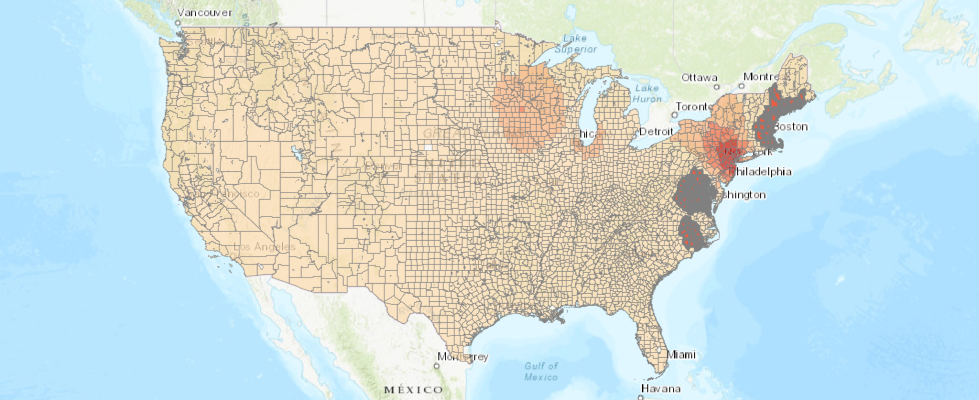

In [95]:
# Create Map
gwr_avg_hhsz_map = gis.map('USA', 4)
gwr_avg_hhsz_map

> The map shows how provider count varies with average household size for different counties. We can see:
- Counties in New York, New Jersey and Philadelphia where an increase in average household size will have a higher impact on provider count.
- Similarly, for counties in Washington, Virginia, Maine, New Hampshire, Massachusetts an increase in average household size will have a higher impact on provider count.
- In the Midwest, areas near Chicago and Minneapolis also see a higher impact on provider count.

In [93]:
gwr_avg_hhsz_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_hhsz_map,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='C_AVG_HHSZ',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.1) # specify opacity

True

In [94]:
# Add Legend
gwr_avg_hhsz_map.legend = True

##### Map of Standard Error 

In [12]:
gwr_avg_hhsz_map2 = gis.map('USA', 6)
gwr_avg_hhsz_map2

MapView(layout=Layout(height='400px', width='100%'), zoom=6.0)

In [13]:
gwr_avg_hhsz_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_hhsz_map2,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='SE_AVG_HHSZ',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.01) # specify opacity

True

In [14]:
gwr_avg_hhsz_map2.legend=True

#### Plot Average Prescription Drug


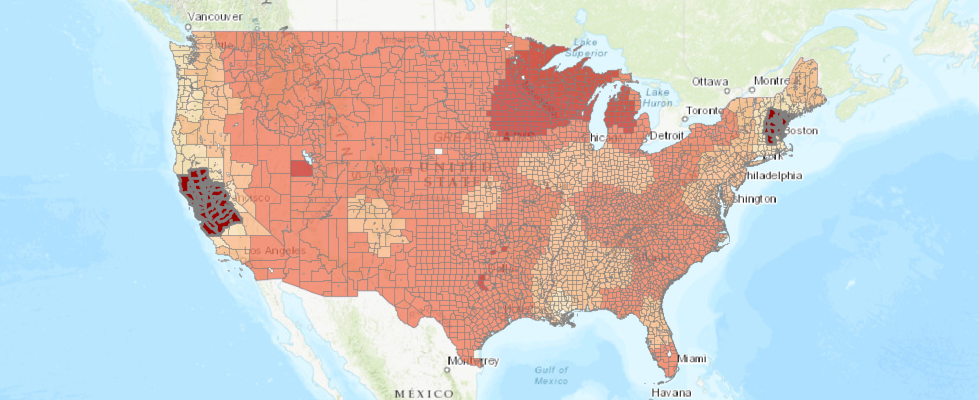

In [101]:
# Create Map
gwr_avg_presdrug_map = gis.map('USA', 4)
gwr_avg_presdrug_map

> The map shows how provider count varies with average prescription drug prices for different counties. We can see:
- Provider Count, in majority of California and areas in New Hampshire, is strongly negatively impacted by increase in average prescription drug prices. This means increase in average prescription drug prices will reduce provider count
- For areas in Minnesota and Wisconsin, provider count is strongly positively impacted by increase in average prescription drug prices.This means increase in average prescription drug prices will increase provider count
- Although for majority of midwest, provider count is positively impacted by average prescription drug prices, some counties in North New Mexico, Southern Colorado and Kansas seem to have a slight negative impact.

In [99]:
gwr_avg_presdrug_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_presdrug_map,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='C_AVG_PRESDRUG',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [100]:
gwr_avg_presdrug_map.legend = True

## Forest Based Classification and Regression Trees Model

The global model and GWR model assume a linear relationship between predictors and response variable and identifies influential factors at the country level and at county level. However, the question we ask here is: 

`What if this relationship is not linear?` 

To answer this question, we will explore `Forest Based Classification and Regression Trees Model`. Forest based models are good black box models that map non-linear and complex relationships quite well and are not influenced by outliers and missing values to an extent.

Forest Based Classification and Regression Trees creates an ensemble of decision trees. Each decision tree is created using randomly generated portions of data. Each tree generates its own prediction and votes on an outcome. The forest model considers votes from all decision trees to predict or classify the outcome. The model will output a variable importance table to identify importance of each variable given to the model. 

Leran more about [Forest Based Classification and Regression Trees](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/forestbasedclassificationregression.htm).

### Build RF Model

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

In [17]:
from arcpy.stats import Forest

In [18]:
arcpy.stats.Forest("TRAIN", r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                   "provider_count", None, "asian_pop false;avg_healthcare false;avg_healthinsurance false;avg_hhinc false;avg_hhsz false;avg_labtest false;avg_medicare false;avg_personalinsurance false;avg_presdrug false;black_pop false;grad_deg false;hisp_pop false;median_age false;some_college false;unemp_rate false;white_pop false",
                   None, None, None, None, None, None, None, None, None, r"C:\Users\mohi9282\Desktop\arcgis\RF_results\RF_results.gdb\RF_VImpNB_table",
                   "TRUE", 100, None, None, 100, None, 30, None, r"C:\Users\mohi9282\Desktop\arcgis\RF_results\RF_results.gdb\RF_R2NB_table",
                   None, 5, "FALSE")

<Result ''>

### Get Variable Importance

In [24]:
# RF Vimp Table
rf_df = pd.DataFrame.spatial.from_table(r'C:/Users/mohi9282/Desktop/arcgis/RF_results/RF_results.gdb/RF_VImp_table')
rf_df.head()

ASIAN_POP      AVG_HHSZ     AVG_HHINC     BLACK_POP      HISP_POP  \
0  1.404548e+10  1.024031e+09  1.494369e+09  9.514784e+09  1.090669e+10   
1  1.076035e+10  8.036757e+08  4.491920e+08  9.554828e+09  1.285247e+10   
2  8.040399e+09  5.612380e+08  8.659435e+08  1.007235e+10  7.586628e+09   
3  1.125022e+10  9.650194e+08  6.856346e+08  5.805497e+09  7.684994e+09   
4  1.026588e+10  8.851161e+08  1.285743e+09  1.100766e+10  8.323305e+09   

     MEDIAN_AGE    UNEMP_RATE     WHITE_POP  SOME_COLLEGE      GRAD_DEG  \
0  3.429596e+08  4.239935e+08  1.993212e+10  2.220219e+10  3.313682e+10   
1  3.873502e+08  5.363891e+08  1.799302e+10  2.500619e+10  2.990975e+10   
2  3.378911e+08  2.988481e+08  1.366124e+10  2.021749e+10  2.553580e+10   
3  3.548502e+08  4.277580e+08  1.829293e+10  2.524092e+10  2.721931e+10   
4  2.768771e+08  2.217782e+08  1.870817e+10  1.860849e+10  2.607333e+10   

   AVG_HEALTHCARE  AVG_HEALTHINSURANCE  AVG_MEDICARE   AVG_LABTEST  \
0    2.791111e+08         7.916462e+08  4.187096e+08  5.701878e+08   
1    2.904740e+08         4.459903e+08  2.471310e+08  2.313675e+08   
2    3.465692e+08         2.522644e+08  2.168057e+08  3.054309e+08   
3    3.709241e+08         1.711320e+08  4.070033e+08  4.476650e+08   
4    2.176186e+08         3.770266e+08  2.661931e+08  3.365612e+08   

   AVG_PRESDRUG  AVG_PERSONALINSURANCE        BEST_ITE  OBJECTID  
0  9.568807e+08           8.663526e+08      Iterations         1  
1  3.252377e+08           2.414814e+08  Best Iteration         2  
2  3.135514e+08           3.405639e+08      Iterations         3  
3  4.329408e+08           3.351842e+08      Iterations         4  
4  2.872452e+08           1.626135e+09      Iterations         5

In [25]:
rf_df.shape

(5, 18)

### Plot Variable Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

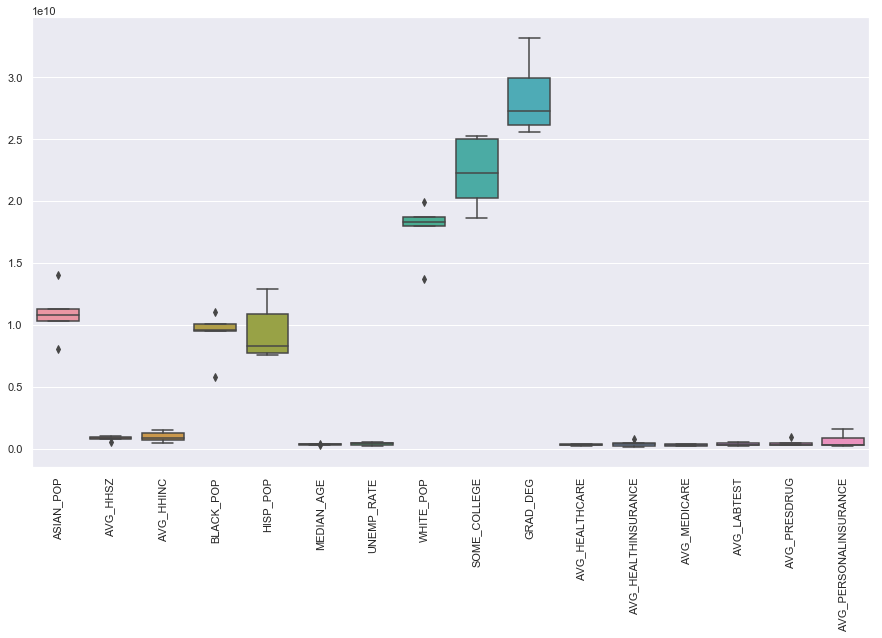

In [52]:
sns.set(rc={'figure.figsize':(15,8.27)})
g = sns.boxplot(data = rf_df.iloc[:,:-2])
plt.xticks(rotation=90)

> We ran 5 iterations of Random Forest model. The box plot shows variable importance of each variable and how importance varies for each iteration. These variables will now be used in the next step of our analysis to understand how they vary with respect to provider count accross various counties in U.S.

#### Plot Best Iteration

In [26]:
# Create dataframe for Best Iteration
best = rf_df[rf_df['BEST_ITE']=='Best Iteration']
best

ASIAN_POP      AVG_HHSZ     AVG_HHINC     BLACK_POP      HISP_POP  \
1  1.076035e+10  8.036757e+08  4.491920e+08  9.554828e+09  1.285247e+10   

     MEDIAN_AGE    UNEMP_RATE     WHITE_POP  SOME_COLLEGE      GRAD_DEG  \
1  3.873502e+08  5.363891e+08  1.799302e+10  2.500619e+10  2.990975e+10   

   AVG_HEALTHCARE  AVG_HEALTHINSURANCE  AVG_MEDICARE   AVG_LABTEST  \
1    2.904740e+08         4.459903e+08  2.471310e+08  2.313675e+08   

   AVG_PRESDRUG  AVG_PERSONALINSURANCE        BEST_ITE  OBJECTID  
1  3.252377e+08           2.414814e+08  Best Iteration         2

Text(0.5, 1.0, 'Variable Importance - Best Iteration')

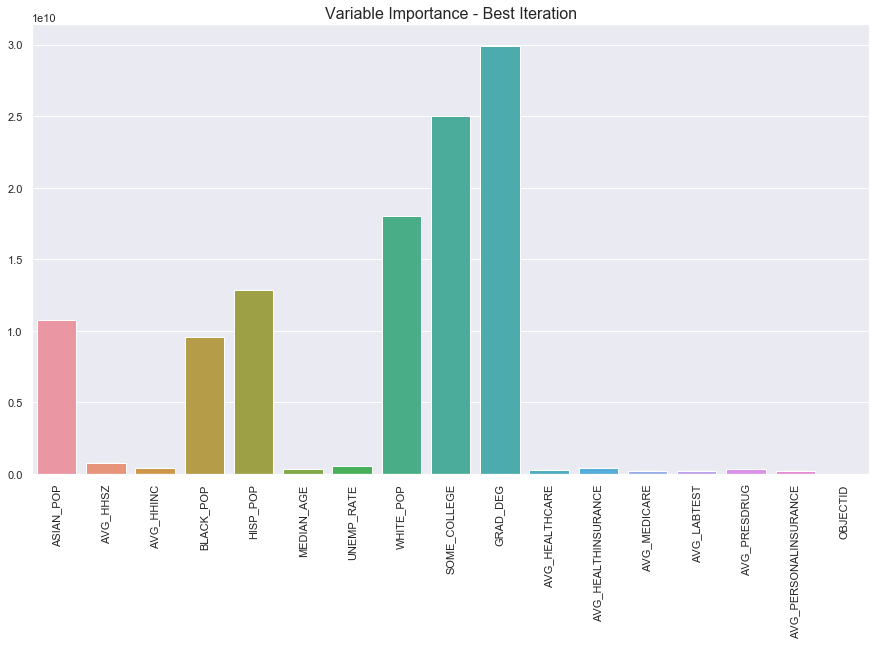

In [32]:
# Create Plot
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(data=best)
plt.xticks(rotation=90)
plt.title('Variable Importance - Best Iteration', fontsize=16)

The plot shows variable importance as determined by the best iteration of Random Forest model.

## Local Bivariate Relationships (LBR) Model

Random Forest model generates variable importance and gives us important variables. However, this model does not tell us:
- the type of relationship and 
- significance of relation of a predictor variable with respect to provider count.

To understand the type and significance of the relations of a predictor variable with respect to provider count at the County level, we will explore `Local Bivariate Relations Model`.

Local Bivariate Relations analyzes two variables for statistically significant relationships using local entropy. The output can be used to visualize the type of relationship between two variables and explore how their relationship changes across counties.

We will use Local Bivariate Relations to study how relationship of important variables determined by Random Forest model change with respect to Provider Count accross various counties. 

Learn more about [Local Bivariate Relationships](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/localbivariaterelationships.htm).


### Build Model - Provider Count and White Population

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

In [20]:
import arcpy
from arcpy.stats import LocalBivariateRelationships

In [22]:
# Local bivariate
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "white_pop", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_white_pop_LBR",
                                        50, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)
# arcpy.stats.LocalBivariateRelationships(mental_prov_layer, "provider_count","grad_deg", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\mental_grad_deg_LBR",30, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\mental_grad_deg_LBR_notebook'>

#### Access Model Results as Spatially Enabled Dataframe

In [83]:
# Access GWR data from local
lbr_whitepop = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_white_pop_LBR')
lbr_whitepop.head()

OBJECTID  SOURCE_ID  provider_count  white_pop   ENTROPY  PVALUES  \
0         1          1          1044.0      75625  0.463670    0.005   
1         2          2             5.0        494  0.172985    0.005   
2         3          3           621.0      51908  0.392919    0.005   
3         4          4            79.0      16894  0.322509    0.005   
4         5          5          1210.0      31300  0.347374    0.005   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1   P_COEF_2  \
0  99% Confidence  -0.000895  0.955449   -0.004775  1.360499  -3.866544   
1  99% Confidence  -0.000454  0.991115   -0.002512  2.194106 -60.014844   
2  99% Confidence  -0.010202  1.137936   -0.004555  0.707942   2.594432   
3  99% Confidence  -0.003358  0.876637   -0.000793  0.457978   5.179018   
4  99% Confidence  -0.003391  0.903693   -0.000686  0.501848   4.935998   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -222.467382  0.553300 -221.688539  0.558060       _*        _*_   
1 -401.267715  0.513645 -407.081515  0.578266       _*        ***   
2 -305.122955  0.946124 -314.600098  0.956583       **        ***   
3 -304.556412  0.768763 -305.208207  0.777680       **        _**   
4 -302.769404  0.741085 -303.106776  0.749499       **        _*_   

          LBR_TYPE                                         HTML_CHART  \
0  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
1          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
2           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   
3  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
4  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   

                                               SHAPE  
0  {'rings': [[[-76.59976019599998, 38.4347499310...  
1  {'rings': [[[-91.09608969999994, 32.6789840000...  
2  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  {'rings': [[[-83.91481999999996, 33.7442000000...

In [84]:
lbr_whitepop.shape

(3139, 21)

In [85]:
# Counts of different relationship types
lbr_whitepop.LBR_TYPE.value_counts()

Convex             1928
Positive Linear    1058
Concave             153
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


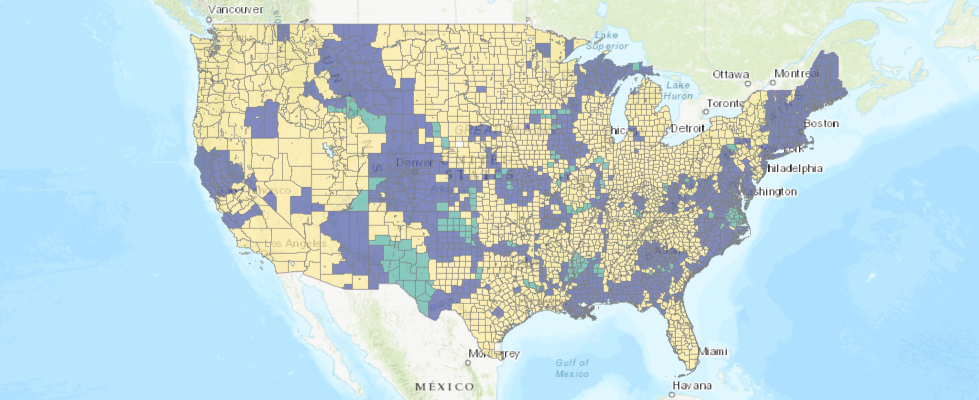

In [90]:
# Create Map
lbr_whitepop_map = gis.map('USA', 4)
lbr_whitepop_map

> The map shows how relationship of provider count varies with white population for different counties. We can see:
- For most of the counties in United States, the relationship is either Convex or Positive Linear which means that provider count increase with increasing white population either linearly or polynomially.
- Southern parts of New Mexico, some counties in North Texas, Wyoming and Idaho have a concave relationship. This means that provider count increases to a certain extent and then plateaus off at some point.

In [87]:
lbr_whitepop_map.remove_layers()
lbr_whitepop.spatial.plot(map_widget=lbr_whitepop_map,
        renderer_type='u',  # for class breaks renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='Spectral',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [88]:
lbr_whitepop_map.legend = True

### Build Model - Provider Count and Graduate Degree

In [22]:
# Local bivariate
import arcpy
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "grad_deg", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_grad_deg_LBR",
                                        50, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\mental_grad_deg_LBR_notebook'>

#### Access Model Results as Spatially Enabled Dataframe

In [76]:
# Access GWR data from local
lbr_graddeg = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_grad_deg_LBR')
lbr_graddeg.head()

OBJECTID  SOURCE_ID  provider_count  grad_deg   ENTROPY  PVALUES  \
0         1          1          1044.0      8931  0.507737    0.005   
1         2          2             5.0        45  0.152911    0.005   
2         3          3           621.0      2153  0.351782    0.005   
3         4          4            79.0       574  0.309155    0.005   
4         5          5          1210.0      5462  0.312456    0.005   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1   P_COEF_2  \
0  99% Confidence   0.002849  0.458452   -0.002108  0.792085  -1.261173   
1  99% Confidence   0.000017  1.115497    0.000651  0.470873  31.338637   
2  99% Confidence  -0.001591  1.237535    0.000261  0.940722   2.061568   
3  99% Confidence   0.000208  0.615024    0.000161  0.623251  -0.054390   
4  99% Confidence   0.000090  0.603811    0.000518  0.535677   0.441553   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -247.686399  0.730247 -255.821543  0.776701       _*        _**   
1 -446.296708  0.802377 -449.717733  0.820235       _*        _**   
2 -329.967431  0.967221 -333.471945  0.970232       _*        _**   
3 -411.125820  0.972559 -408.795514  0.971995       _*        _*_   
4 -434.274636  0.981340 -435.557616  0.982284       _*        _**   

          LBR_TYPE                                         HTML_CHART  \
0          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
1           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   
2           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   
3  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
4  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   

                                               SHAPE  
0  {'rings': [[[-76.59976019599998, 38.4347499310...  
1  {'rings': [[[-91.09608969999994, 32.6789840000...  
2  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  {'rings': [[[-83.91481999999996, 33.7442000000...

In [77]:
lbr_graddeg.shape

(3139, 21)

In [78]:
lbr_graddeg.LBR_TYPE.value_counts()

Positive Linear    1170
Convex             1081
Concave             888
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


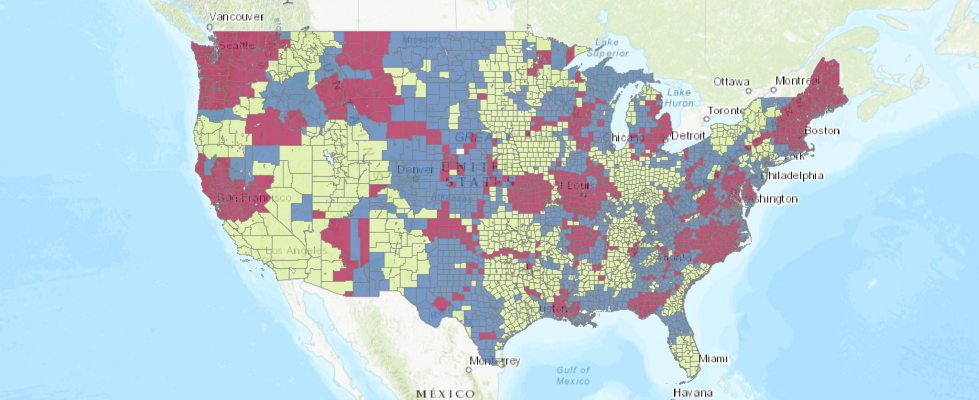

In [82]:
# Create Map
lbr_graddeg_map = gis.map('USA', 4)
lbr_graddeg_map

> The map shows how relationship of provider count varies with graduate degree holders for different counties. We can see:
- Majority of the counties from North Dakota to Texas share a Convex or Positive Linear relation. This means that provider count increase with increasing graduate degree holders for these counties either linearly or polynomially.
- Majority of East and West coast share a concave relation whcih means that provider count increases with graduater degree holders to a certain extent and then plateaus off at some point.

In [80]:
lbr_graddeg_map.remove_layers()
lbr_graddeg.spatial.plot(map_widget=lbr_graddeg_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='Spectral',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [81]:
lbr_graddeg_map.legend = True

### Build Model - Provider Count and Some College

In [7]:
# Local bivariate
import arcpy
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "some_college", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_some_college_LBR",
                                        50, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\allprovider_some_college_LBR'>

#### Access Model Results as Spatially Enabled Dataframe

In [8]:
# Access GWR data from local
lbr_somecollege = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_some_college_LBR')
lbr_somecollege.head()

OBJECTID  SOURCE_ID  provider_count  some_college   ENTROPY  PVALUES  \
0         1          1          1044.0         16211  0.412861    0.005   
1         2          2             5.0           199  0.160101    0.005   
2         3          3           621.0          7627  0.379222    0.005   
3         4          4            79.0          2043  0.304016    0.005   
4         5          5          1210.0         11944  0.317968    0.005   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1   P_COEF_2  \
0  99% Confidence  -0.002325  1.240143   -0.006298  1.813043  -6.929739   
1  99% Confidence  -0.001165  1.111885    0.000155  0.416592  28.076442   
2  99% Confidence  -0.002453  1.104659   -0.007469  1.614583  -2.717534   
3  99% Confidence  -0.002390  0.950264   -0.000441  0.554460   4.878193   
4  99% Confidence  -0.003047  0.936799    0.000094  0.404827   6.442083   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -239.095424  0.679678 -239.232707  0.688845       _*        _*_   
1 -491.751946  0.920381 -520.266286  0.956154       **        _**   
2 -289.723289  0.926691 -304.818982  0.947202       _*        ***   
3 -336.755131  0.878554 -338.959543  0.886808       **        _**   
4 -331.378582  0.853896 -337.060410  0.872974       **        _**   

          LBR_TYPE                                         HTML_CHART  \
0  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
1           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   
2          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
3  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
4           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   

                                               SHAPE  
0  {'rings': [[[-76.59976019599998, 38.4347499310...  
1  {'rings': [[[-91.09608969999994, 32.6789840000...  
2  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  {'rings': [[[-83.91481999999996, 33.7442000000...

In [9]:
lbr_somecollege.shape

(3139, 21)

In [71]:
lbr_somecollege.LBR_TYPE.value_counts()

Convex             1810
Positive Linear    1158
Concave             171
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


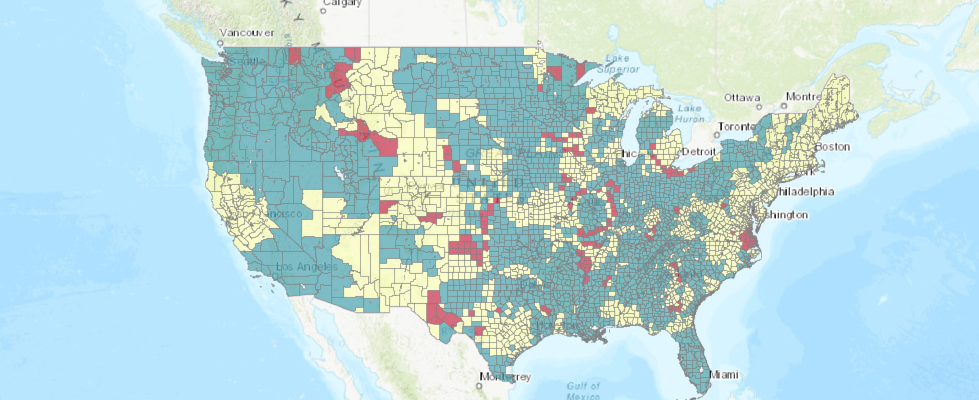

In [75]:
# Create Map
lbr_somecollege_map = gis.map('USA', 4)
lbr_somecollege_map

> The map shows how relationship of provider count varies with some college degree factor for different counties. We can see
- While majority of the counties on West Coast share a Convex relation, counties in Northern and Central California have Positive Linear relation. This means that provider count increase with increasing some college degree holders for these counties either linearly or polynomially.
- Counties in Montana, Wyoming, Colorado and New Mexico share a positive linear relation. THere is a patch of counties in Northern New Mexico and Southern Colorado that have a convex relation.
- While majority of counties on east coast share a positive linear relation, there is a group of counties in Eastern Virginia that have a concave relation of provider count with resect to some college degree factor.

In [73]:
lbr_somecollege_map.remove_layers()
lbr_somecollege.spatial.plot(map_widget=lbr_somecollege_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='Spectral',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [74]:
lbr_somecollege_map.legend = True

### Build Model - Provider Count and Asian Population

In [19]:
# Local bivariate
import arcpy
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "asian_pop", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_asian_pop_LBR",
                                        50, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\allprovider_asian_pop_LBR'>

#### Access Model Results as Spatially Enabled Dataframe

In [59]:
# Access GWR data from local
lbr_asianpop = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_asian_pop_LBR')
lbr_asianpop.head()

OBJECTID  SOURCE_ID  provider_count  asian_pop   ENTROPY  PVALUES  \
0         1          1          1044.0       1701  0.407143    0.005   
1         2          2             5.0          6  0.104627    0.005   
2         3          3           621.0        421  0.282592    0.005   
3         4          4            79.0        258  0.249337    0.005   
4         5          5          1210.0       1727  0.246918    0.005   

          LBR_SIG  INTERCEPT     COEF_1  PINTERCEPT   P_COEF_1      P_COEF_2  \
0  99% Confidence   0.011049   0.853095    0.005589   2.130458    -10.399164   
1  99% Confidence   0.000533  11.817893   -0.000723  30.692292 -11764.379761   
2  99% Confidence   0.003783   4.603926    0.002074   6.412872    -47.014916   
3  99% Confidence   0.003808   1.345723    0.000581   3.799717    -38.900407   
4  99% Confidence   0.003294   1.329331   -0.000007   3.501951    -34.415652   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -205.282799  0.370089 -212.376534  0.467590       **        _**   
1 -408.960493  0.583001 -423.367755  0.695507       _*        _**   
2 -270.784432  0.892932 -273.761122  0.901738       _*        _**   
3 -288.388956  0.680489 -347.453812  0.904493       **        _**   
4 -298.051381  0.715464 -353.672868  0.908883       **        _**   

          LBR_TYPE                                         HTML_CHART  \
0          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
1          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
2  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
3          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
4          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   

                                               SHAPE  
0  {'rings': [[[-76.59976019599998, 38.4347499310...  
1  {'rings': [[[-91.09608969999994, 32.6789840000...  
2  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  {'rings': [[[-83.91481999999996, 33.7442000000...

In [60]:
lbr_asianpop.shape

(3139, 21)

In [61]:
lbr_asianpop.LBR_TYPE.value_counts()

Concave            1602
Positive Linear     883
Convex              654
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


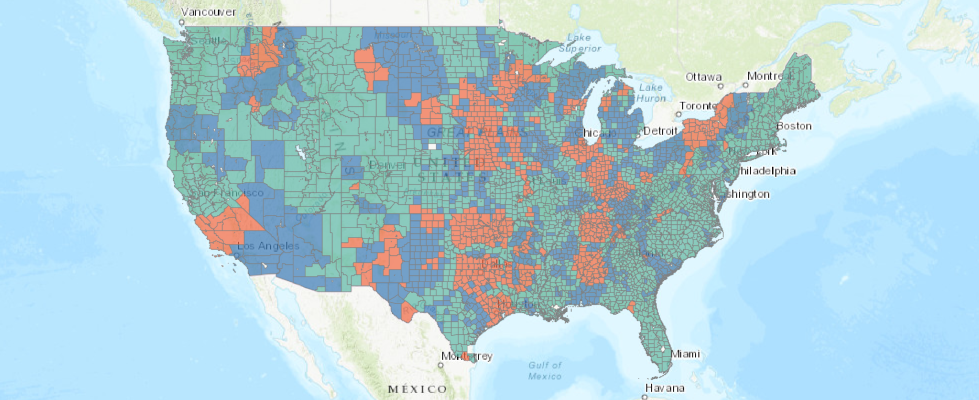

In [65]:
# Create Map
lbr_asianpop_map = gis.map('USA', 4)
lbr_asianpop_map

> The map shows how relationship of provider count varies with asian population for different counties. We can see:
- Majority of the counties in U.S. share a concave relation whcih means that provider count increases with asian population to a certain extent and then plateaus off at some point.
- THere are counties in Southern California, Arizona, North Central U.S. and in Texas that share a Convex or Positive Linear relation. This means that provider count increase with increasing asian population for these counties either linearly or polynomially.

In [63]:
lbr_asianpop_map.remove_layers()
lbr_asianpop.spatial.plot(map_widget=lbr_asianpop_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='Spectral',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [64]:
lbr_asianpop_map.legend = True

### Build Model - Provider Count and Hispanic Population

In [27]:
# Local bivariate
import arcpy
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "hisp_pop", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_hisp_pop_LBR",
                                        50, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\allprovider_hisp_pop_LBR'>

#### Access Model Results as Spatially Enabled Dataframe

In [36]:
# Access GWR data from local
lbr_hisppop = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_hisp_pop_LBR')
lbr_hisppop.head()

OBJECTID  SOURCE_ID  provider_count  hisp_pop   ENTROPY  PVALUES  \
0         1          1          1044.0      3945  0.353785    0.005   
1         2          2             5.0         8  0.116426    0.005   
2         3          3           621.0      2977  0.274160    0.005   
3         4          4            79.0      1307  0.240308    0.005   
4         5          5          1210.0      9491  0.237501    0.005   

          LBR_SIG  INTERCEPT     COEF_1  PINTERCEPT   P_COEF_1      P_COEF_2  \
0  99% Confidence   0.006163   2.913526    0.000116   6.279947    -94.205674   
1  99% Confidence  -0.001054  20.038242    0.000973  -5.012714  33358.476172   
2  99% Confidence   0.000911  10.814706   -0.000861  13.368877   -143.607194   
3  99% Confidence   0.003054   2.540055   -0.001369   6.493641   -130.663783   
4  99% Confidence   0.002768   2.435885   -0.001722   5.992682   -116.207395   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -220.527230  0.535626 -225.753548  0.592568       _*        _**   
1 -398.998698  0.491065 -404.728743  0.557947       _*        __*   
2 -278.421387  0.908098 -278.436223  0.910509       _*        _*_   
3 -269.889131  0.537435 -300.986160  0.758092       _*        _**   
4 -272.153447  0.522378 -294.913414  0.704895       _*        _**   

          LBR_TYPE                                         HTML_CHART  \
0          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
1           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   
2  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
3          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
4          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   

                                               SHAPE  
0  {'rings': [[[-76.59976019599998, 38.4347499310...  
1  {'rings': [[[-91.09608969999994, 32.6789840000...  
2  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  {'rings': [[[-83.91481999999996, 33.7442000000...

In [37]:
lbr_hisppop.shape

(3139, 21)

In [38]:
lbr_hisppop.LBR_TYPE.value_counts()

Positive Linear    1133
Concave            1117
Convex              888
Not Significant       1
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


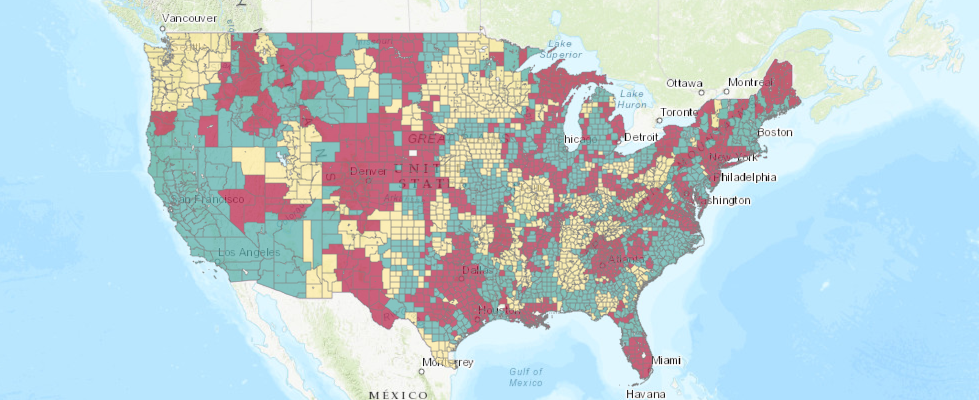

In [58]:
# Create Map
lbr_hisppop_map = gis.map('USA', 4)
lbr_hisppop_map

> The map shows how relationship of provider count varies with graduate degree holders for different counties. We can see:
- Majority of the counties in Arizona, California, Oregon share Positive Linear relation. This means that provider count increase with increasing hispanic population for these counties.
- Counties in Washington share a convex relation which means that provider count increases polynomially with increasing hispanic population.
- Counties in Midwest share a concave relation whcih means that provider count increases with hispanic population to a certain extent and then plateaus off at some point.

In [56]:
lbr_hisppop_map.remove_layers()
lbr_hisppop.spatial.plot(map_widget=lbr_hisppop_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='Spectral',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [57]:
lbr_hisppop_map.legend = True

### Build Model - Provider Count and Black Population

In [38]:
# Local bivariate
import arcpy
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "black_pop", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_black_pop_LBR",
                                        50, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\allprovider_black_pop_LBR'>

#### Access Model Results as Spatially Enabled Dataframe

In [4]:
# Access GWR data from local
lbr_blackpop = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\allprovider_black_pop_LBR')
lbr_blackpop.head()

OBJECTID  SOURCE_ID  provider_count  black_pop   ENTROPY  PVALUES  \
0         1          1          1044.0      12062  0.571091    0.005   
1         2          2             5.0        895  0.256176    0.005   
2         3          3           621.0       1422  0.422034    0.005   
3         4          4            79.0        558  0.415150    0.005   
4         5          5          1210.0      49467  0.452084    0.005   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1  P_COEF_2  \
0  99% Confidence   0.005813  0.345843   -0.002936  0.875985 -1.444089   
1  99% Confidence  -0.000626  0.275433   -0.001040  0.330293 -0.423418   
2  99% Confidence   0.007675  0.469969    0.003419  1.027829 -1.216840   
3  99% Confidence   0.001669  0.286946    0.001666  0.287304 -0.001148   
4  99% Confidence   0.000072  0.271030    0.001748  0.138663  0.432622   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -237.965382  0.672356 -288.303731  0.883386       **        _**   
1 -487.598221  0.913484 -487.756500  0.915995       **        **_   
2 -257.031064  0.859033 -350.477159  0.978815       **        ***   
3 -359.425723  0.922827 -357.058650  0.921185       **        _*_   
4 -358.004729  0.914219 -370.301027  0.934662       _*        ***   

          LBR_TYPE                                         HTML_CHART  \
0          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
1  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
2          Concave  <html>\n  <head>\n    <meta charset = "utf-8">...   
3  Positive Linear  <html>\n  <head>\n    <meta charset = "utf-8">...   
4           Convex  <html>\n  <head>\n    <meta charset = "utf-8">...   

                                               SHAPE  
0  {'rings': [[[-76.59976019599998, 38.4347499310...  
1  {'rings': [[[-91.09608969999994, 32.6789840000...  
2  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  {'rings': [[[-83.91481999999996, 33.7442000000...

In [5]:
lbr_blackpop.shape

(3139, 21)

In [6]:
lbr_blackpop.LBR_TYPE.value_counts()

Concave            1382
Positive Linear    1346
Convex              402
Not Significant       9
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


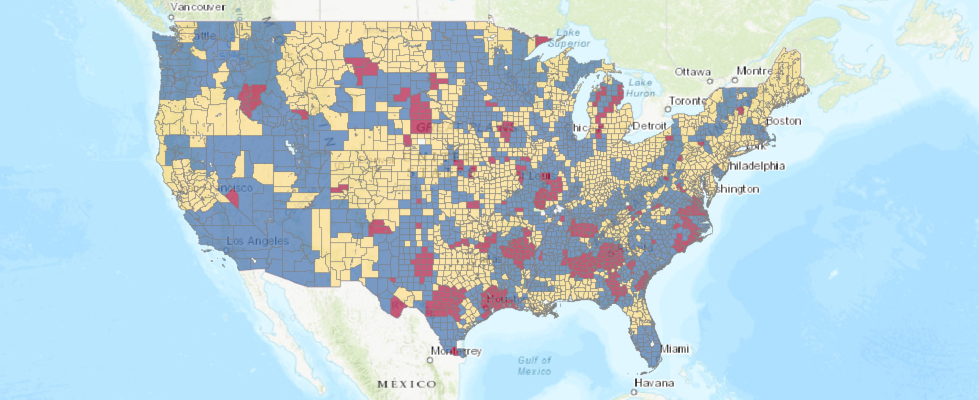

In [53]:
# Create Map
lbr_blackpop_map = gis.map('USA', 4)
lbr_blackpop_map

> The map shows how relationship of provider count varies with black population for different counties. We can see:
- Majority of the counties in U.S. share a concave relation which means that provider count increases with black population to a certain extent and then plateaus off at some point.
- Majority of the counties on west coast share a Positive Linear relation. This means that provider count increases with increasing black population for these counties.


In [50]:
lbr_blackpop_map.remove_layers()
lbr_blackpop.spatial.plot(map_widget=lbr_blackpop_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='Spectral',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [51]:
lbr_blackpop_map.legend = True

## Summary